In [1]:
import pandas as pd

# Path sesuai lokasi file 
file_path = 'C:/Users/ASUS/ProyekDasiDalis/toba_caffeine_survey.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Menampilkan 5 baris pertama data
print(df.head())

                       name age       gender favorite_caffeine_drink  \
0        Servika Tampubolon  22    Perempuan                   Latte   
1                Advryanti   20    Perempuan                     NaN   
2            Paraz sibarani  37    Perempuan                   Latte   
3  Andika Bartolomeus Purba  19  Laki - Laki               Americano   
4                     Yenny  20    Perempuan                     NaN   

  caffeine_frequency      caffeine_time mood_drop_without_caffeine  \
0             Sering        Pagi, Siang           Penurunan Sedang   
1      Sangat Sering               Pagi            Penurunan Besar   
2      Kadang-kadang              Siang          Penurunan Sedikit   
3             Jarang  Pagi, Siang, Sore        Tidak Ada Perubahan   
4       Tidak Pernah                NaN           Penurunan Sedang   

  caffeine_before_sleep     caffeine_reason  sleep_quality  \
0          Tidak Pernah      Menambah fokus            5.0   
1                Jaran

In [2]:
# Ukuran dataset
rows, cols = df.shape
print(f"Jumlah Baris: {rows}")
print(f"Jumlah Kolom: {cols}")

Jumlah Baris: 2033
Jumlah Kolom: 20


In [3]:
# Informasi kolom & tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             2033 non-null   object 
 1   age                              2033 non-null   object 
 2   gender                           2033 non-null   object 
 3   favorite_caffeine_drink          1975 non-null   object 
 4   caffeine_frequency               2012 non-null   object 
 5   caffeine_time                    1992 non-null   object 
 6   mood_drop_without_caffeine       1999 non-null   object 
 7   caffeine_before_sleep            2007 non-null   object 
 8   caffeine_reason                  2014 non-null   object 
 9   sleep_quality                    2012 non-null   float64
 10  sleep_difficulty_after_caffeine  2017 non-null   float64
 11  feeling_without_caffeine         2002 non-null   object 
 12  mood_effect_caffeine

In [4]:
# Melihat daftar nama kolom
df.columns

Index(['name', 'age', 'gender', 'favorite_caffeine_drink',
       'caffeine_frequency', 'caffeine_time', 'mood_drop_without_caffeine',
       'caffeine_before_sleep', 'caffeine_reason', 'sleep_quality',
       'sleep_difficulty_after_caffeine', 'feeling_without_caffeine',
       'mood_effect_caffeine', 'stress_effect_caffeine',
       'confidence_boost_from_caffeine', 'concentration_without_caffeine',
       'work_duration_increase', 'focus_boost_caffeine',
       'physical_side_effects_impact', 'digestion_issues_from_caffeine'],
      dtype='object')

In [5]:
# Mencek missing value/outlier
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

favorite_caffeine_drink            58
caffeine_frequency                 21
caffeine_time                      41
mood_drop_without_caffeine         34
caffeine_before_sleep              26
caffeine_reason                    19
sleep_quality                      21
sleep_difficulty_after_caffeine    16
feeling_without_caffeine           31
mood_effect_caffeine               97
stress_effect_caffeine             19
confidence_boost_from_caffeine     23
concentration_without_caffeine     22
work_duration_increase             22
focus_boost_caffeine               20
physical_side_effects_impact       19
digestion_issues_from_caffeine     20
dtype: int64

In [6]:
# Mengecek Jumlah Data Duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


In [7]:
# Data Cleaning - Kolom age

# Memastikan kolom age bertipe string
df['age'] = df['age'].astype(str)

# Mengambil angka saja dari kolom age (regex aman)
df['age'] = df['age'].str.extract(r'(\d+)')

# Mengonversi ke numerik
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Cek hasil
df['age'].head()

0    22
1    20
2    37
3    19
4    20
Name: age, dtype: int64

In [8]:
object_cols = df.select_dtypes(include='object').columns
columns_to_clean = [col for col in object_cols if col not in ['name', 'age']]

for col in columns_to_clean:
    df[col] = df[col].replace('Tidak ada', 'Tidak Memilih')
    df[col] = df[col].fillna('Tidak Memilih')

print("Categorical columns cleaned: 'Tidak ada' and NaN values replaced with 'Tidak Memilih'.")

display(df.info())
display(df.isnull().sum())
display(df.head())


Categorical columns cleaned: 'Tidak ada' and NaN values replaced with 'Tidak Memilih'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             2033 non-null   object 
 1   age                              2033 non-null   int64  
 2   gender                           2033 non-null   object 
 3   favorite_caffeine_drink          2033 non-null   object 
 4   caffeine_frequency               2033 non-null   object 
 5   caffeine_time                    2033 non-null   object 
 6   mood_drop_without_caffeine       2033 non-null   object 
 7   caffeine_before_sleep            2033 non-null   object 
 8   caffeine_reason                  2033 non-null   object 
 9   sleep_quality                    2012 non-null   float64
 10  sleep_difficulty_after_caffeine  2017 non-null   float64


None

name                                0
age                                 0
gender                              0
favorite_caffeine_drink             0
caffeine_frequency                  0
caffeine_time                       0
mood_drop_without_caffeine          0
caffeine_before_sleep               0
caffeine_reason                     0
sleep_quality                      21
sleep_difficulty_after_caffeine    16
feeling_without_caffeine            0
mood_effect_caffeine                0
stress_effect_caffeine              0
confidence_boost_from_caffeine      0
concentration_without_caffeine      0
work_duration_increase              0
focus_boost_caffeine                0
physical_side_effects_impact        0
digestion_issues_from_caffeine      0
dtype: int64

,name,age,gender,favorite_caffeine_drink,caffeine_frequency,caffeine_time,mood_drop_without_caffeine,caffeine_before_sleep,caffeine_reason,sleep_quality,sleep_difficulty_after_caffeine,feeling_without_caffeine,mood_effect_caffeine,stress_effect_caffeine,confidence_boost_from_caffeine,concentration_without_caffeine,work_duration_increase,focus_boost_caffeine,physical_side_effects_impact,digestion_issues_from_caffeine
0,Servika Tampubolon,22,Perempuan,Latte,Sering,"Pagi, Siang",Penurunan Sedang,Tidak Pernah,Menambah fokus,5.0,1.0,Tidak fokus,Meningkatkan Banyak,Mengurangi stres,Sangat Meningkatkan,Sulit,Sering,Tidak Memilih,Tidak Pernah Mengganggu,Jarang
1,Advryanti,20,Perempuan,Tidak Memilih,Sangat Sering,Pagi,Penurunan Besar,Jarang,Menghindari kantuk,4.0,2.0,Mengantuk,Tidak Berpengaruh,Meningkatkan sedikit,Cukup Meningkatkan,Sangat sulit,Selalu,Sangat Membantu,Jarang Mengganggu,Tidak Pernah
2,Paraz sibarani,37,Perempuan,Latte,Kadang-kadang,Siang,Penurunan Sedikit,Tidak Pernah,Kebiasaan,4.0,1.0,Tidak ada perubahan signifikan,Meningkatkan Banyak,Tidak Memilih,Sedikit Meningkatkan,Biasa saja,Kadang-kadang,Cukup Membantu,Tidak Pernah Mengganggu,Kadang-kadang
3,Andika Bartolomeus Purba,19,Laki - Laki,Americano,Jarang,"Pagi, Siang, Sore",Tidak Ada Perubahan,Kadang-kadang,Menambah fokus,NaN,NaN,Sangat gelisah,Meningkatkan Sedikit,Meningkatkan cukup besar,Tidak Berpengaruh Sama Sekali,Sangat sulit,Sering,Malah Mengganggu Fokus,Selalu Mengganggu,Sering
4,Yenny,20,Perempuan,Tidak Memilih,Tidak Pernah,Tidak Memilih,Penurunan Sedang,Jarang,Menghindari kantuk,5.0,1.0,Tidak fokus,Memburuk,Mengurangi stres,Tidak Memilih,Sulit,Sering,Sangat Membantu,Tidak Memilih,Jarang


In [9]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
mode_age = df['age'].mode()[0]
df['age'] = df['age'].fillna(mode_age)
df['age'] = df['age'].astype(int)

print("Kolom 'age' berhasil dikonversi ke tipe data integer dan missing values diisi dengan mode.")
print(f"Mode yang digunakan untuk mengisi missing values adalah: {mode_age}")
display(df['age'].head())
df.info()

Kolom 'age' berhasil dikonversi ke tipe data integer dan missing values diisi dengan mode.
Mode yang digunakan untuk mengisi missing values adalah: 20


0    22
1    20
2    37
3    19
4    20
Name: age, dtype: int32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             2033 non-null   object 
 1   age                              2033 non-null   int32  
 2   gender                           2033 non-null   object 
 3   favorite_caffeine_drink          2033 non-null   object 
 4   caffeine_frequency               2033 non-null   object 
 5   caffeine_time                    2033 non-null   object 
 6   mood_drop_without_caffeine       2033 non-null   object 
 7   caffeine_before_sleep            2033 non-null   object 
 8   caffeine_reason                  2033 non-null   object 
 9   sleep_quality                    2012 non-null   float64
 10  sleep_difficulty_after_caffeine  2017 non-null   float64
 11  feeling_without_caffeine         2033 non-null   object 
 12  mood_effect_caffeine

In [10]:
# Menyeragamkan nilai string pada kolom bertipe object dengan menghapus spasi di awal dan akhir teks
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Menampilkan pesan bahwa proses pembersihan spasi telah selesai
print("Spasi di awal dan akhir teks pada semua kolom string berhasil dihapus.")


Spasi di awal dan akhir teks pada semua kolom string berhasil dihapus.


In [11]:
mode_sleep_quality = df['sleep_quality'].mode()[0]
df['sleep_quality'] = df['sleep_quality'].fillna(mode_sleep_quality)

print(f"Kolom 'sleep_quality' berhasil diisi missing values-nya dengan mode: {mode_sleep_quality}")

display(df.info())
display(df.isnull().sum())
display(df.head())

Kolom 'sleep_quality' berhasil diisi missing values-nya dengan mode: 4.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             2033 non-null   object 
 1   age                              2033 non-null   int32  
 2   gender                           2033 non-null   object 
 3   favorite_caffeine_drink          2033 non-null   object 
 4   caffeine_frequency               2033 non-null   object 
 5   caffeine_time                    2033 non-null   object 
 6   mood_drop_without_caffeine       2033 non-null   object 
 7   caffeine_before_sleep            2033 non-null   object 
 8   caffeine_reason                  2033 non-null   object 
 9   sleep_quality                    2033 non-null   float64
 10  sleep_difficulty_after_caffeine  2017 non-null   float64
 11  feeling_w

None

name                                0
age                                 0
gender                              0
favorite_caffeine_drink             0
caffeine_frequency                  0
caffeine_time                       0
mood_drop_without_caffeine          0
caffeine_before_sleep               0
caffeine_reason                     0
sleep_quality                       0
sleep_difficulty_after_caffeine    16
feeling_without_caffeine            0
mood_effect_caffeine                0
stress_effect_caffeine              0
confidence_boost_from_caffeine      0
concentration_without_caffeine      0
work_duration_increase              0
focus_boost_caffeine                0
physical_side_effects_impact        0
digestion_issues_from_caffeine      0
dtype: int64

,name,age,gender,favorite_caffeine_drink,caffeine_frequency,caffeine_time,mood_drop_without_caffeine,caffeine_before_sleep,caffeine_reason,sleep_quality,sleep_difficulty_after_caffeine,feeling_without_caffeine,mood_effect_caffeine,stress_effect_caffeine,confidence_boost_from_caffeine,concentration_without_caffeine,work_duration_increase,focus_boost_caffeine,physical_side_effects_impact,digestion_issues_from_caffeine
0,Servika Tampubolon,22,Perempuan,Latte,Sering,"Pagi, Siang",Penurunan Sedang,Tidak Pernah,Menambah fokus,5.0,1.0,Tidak fokus,Meningkatkan Banyak,Mengurangi stres,Sangat Meningkatkan,Sulit,Sering,Tidak Memilih,Tidak Pernah Mengganggu,Jarang
1,Advryanti,20,Perempuan,Tidak Memilih,Sangat Sering,Pagi,Penurunan Besar,Jarang,Menghindari kantuk,4.0,2.0,Mengantuk,Tidak Berpengaruh,Meningkatkan sedikit,Cukup Meningkatkan,Sangat sulit,Selalu,Sangat Membantu,Jarang Mengganggu,Tidak Pernah
2,Paraz sibarani,37,Perempuan,Latte,Kadang-kadang,Siang,Penurunan Sedikit,Tidak Pernah,Kebiasaan,4.0,1.0,Tidak ada perubahan signifikan,Meningkatkan Banyak,Tidak Memilih,Sedikit Meningkatkan,Biasa saja,Kadang-kadang,Cukup Membantu,Tidak Pernah Mengganggu,Kadang-kadang
3,Andika Bartolomeus Purba,19,Laki - Laki,Americano,Jarang,"Pagi, Siang, Sore",Tidak Ada Perubahan,Kadang-kadang,Menambah fokus,4.0,NaN,Sangat gelisah,Meningkatkan Sedikit,Meningkatkan cukup besar,Tidak Berpengaruh Sama Sekali,Sangat sulit,Sering,Malah Mengganggu Fokus,Selalu Mengganggu,Sering
4,Yenny,20,Perempuan,Tidak Memilih,Tidak Pernah,Tidak Memilih,Penurunan Sedang,Jarang,Menghindari kantuk,5.0,1.0,Tidak fokus,Memburuk,Mengurangi stres,Tidak Memilih,Sulit,Sering,Sangat Membantu,Tidak Memilih,Jarang


In [12]:
mode_sleep_difficulty_after_caffeine = df['sleep_difficulty_after_caffeine'].mode()[0]
df['sleep_difficulty_after_caffeine'] = df['sleep_difficulty_after_caffeine'].fillna(mode_sleep_difficulty_after_caffeine)

print(f"Kolom 'sleep_difficulty_after_caffeine' berhasil diisi missing values-nya dengan mode: {mode_sleep_difficulty_after_caffeine}")

display(df.info())
display(df.isnull().sum())
display(df.head())

Kolom 'sleep_difficulty_after_caffeine' berhasil diisi missing values-nya dengan mode: 1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             2033 non-null   object 
 1   age                              2033 non-null   int32  
 2   gender                           2033 non-null   object 
 3   favorite_caffeine_drink          2033 non-null   object 
 4   caffeine_frequency               2033 non-null   object 
 5   caffeine_time                    2033 non-null   object 
 6   mood_drop_without_caffeine       2033 non-null   object 
 7   caffeine_before_sleep            2033 non-null   object 
 8   caffeine_reason                  2033 non-null   object 
 9   sleep_quality                    2033 non-null   float64
 10  sleep_difficulty_after_caffeine  2033 non-null   floa

None

name                               0
age                                0
gender                             0
favorite_caffeine_drink            0
caffeine_frequency                 0
caffeine_time                      0
mood_drop_without_caffeine         0
caffeine_before_sleep              0
caffeine_reason                    0
sleep_quality                      0
sleep_difficulty_after_caffeine    0
feeling_without_caffeine           0
mood_effect_caffeine               0
stress_effect_caffeine             0
confidence_boost_from_caffeine     0
concentration_without_caffeine     0
work_duration_increase             0
focus_boost_caffeine               0
physical_side_effects_impact       0
digestion_issues_from_caffeine     0
dtype: int64

,name,age,gender,favorite_caffeine_drink,caffeine_frequency,caffeine_time,mood_drop_without_caffeine,caffeine_before_sleep,caffeine_reason,sleep_quality,sleep_difficulty_after_caffeine,feeling_without_caffeine,mood_effect_caffeine,stress_effect_caffeine,confidence_boost_from_caffeine,concentration_without_caffeine,work_duration_increase,focus_boost_caffeine,physical_side_effects_impact,digestion_issues_from_caffeine
0,Servika Tampubolon,22,Perempuan,Latte,Sering,"Pagi, Siang",Penurunan Sedang,Tidak Pernah,Menambah fokus,5.0,1.0,Tidak fokus,Meningkatkan Banyak,Mengurangi stres,Sangat Meningkatkan,Sulit,Sering,Tidak Memilih,Tidak Pernah Mengganggu,Jarang
1,Advryanti,20,Perempuan,Tidak Memilih,Sangat Sering,Pagi,Penurunan Besar,Jarang,Menghindari kantuk,4.0,2.0,Mengantuk,Tidak Berpengaruh,Meningkatkan sedikit,Cukup Meningkatkan,Sangat sulit,Selalu,Sangat Membantu,Jarang Mengganggu,Tidak Pernah
2,Paraz sibarani,37,Perempuan,Latte,Kadang-kadang,Siang,Penurunan Sedikit,Tidak Pernah,Kebiasaan,4.0,1.0,Tidak ada perubahan signifikan,Meningkatkan Banyak,Tidak Memilih,Sedikit Meningkatkan,Biasa saja,Kadang-kadang,Cukup Membantu,Tidak Pernah Mengganggu,Kadang-kadang
3,Andika Bartolomeus Purba,19,Laki - Laki,Americano,Jarang,"Pagi, Siang, Sore",Tidak Ada Perubahan,Kadang-kadang,Menambah fokus,4.0,1.0,Sangat gelisah,Meningkatkan Sedikit,Meningkatkan cukup besar,Tidak Berpengaruh Sama Sekali,Sangat sulit,Sering,Malah Mengganggu Fokus,Selalu Mengganggu,Sering
4,Yenny,20,Perempuan,Tidak Memilih,Tidak Pernah,Tidak Memilih,Penurunan Sedang,Jarang,Menghindari kantuk,5.0,1.0,Tidak fokus,Memburuk,Mengurangi stres,Tidak Memilih,Sulit,Sering,Sangat Membantu,Tidak Memilih,Jarang


In [13]:
# Data Preprocessing

object_cols = df.select_dtypes(include='object').columns
columns_to_encode = [col for col in object_cols if col != 'name']

print(f"Columns identified for one-hot encoding: {columns_to_encode}")

Columns identified for one-hot encoding: ['gender', 'favorite_caffeine_drink', 'caffeine_frequency', 'caffeine_time', 'mood_drop_without_caffeine', 'caffeine_before_sleep', 'caffeine_reason', 'feeling_without_caffeine', 'mood_effect_caffeine', 'stress_effect_caffeine', 'confidence_boost_from_caffeine', 'concentration_without_caffeine', 'work_duration_increase', 'focus_boost_caffeine', 'physical_side_effects_impact', 'digestion_issues_from_caffeine']


In [14]:
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)

print("One-hot encoding applied to categorical columns.")
display(df_encoded.head())
display(df_encoded.info())
display(df_encoded.describe())

One-hot encoding applied to categorical columns.


,name,age,sleep_quality,sleep_difficulty_after_caffeine,gender_Laki - Laki,gender_Perempuan,favorite_caffeine_drink_Americano,favorite_caffeine_drink_Cappuccino,favorite_caffeine_drink_Espresso,favorite_caffeine_drink_Kopi Tubruk,...,physical_side_effects_impact_Selalu Mengganggu,physical_side_effects_impact_Sering Mengganggu,physical_side_effects_impact_Tidak Memilih,physical_side_effects_impact_Tidak Pernah Mengganggu,digestion_issues_from_caffeine_Jarang,digestion_issues_from_caffeine_Kadang-kadang,digestion_issues_from_caffeine_Sangat sering,digestion_issues_from_caffeine_Sering,digestion_issues_from_caffeine_Tidak Memilih,digestion_issues_from_caffeine_Tidak Pernah
0,Servika Tampubolon,22,5.0,1.0,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,Advryanti,20,4.0,2.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Paraz sibarani,37,4.0,1.0,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,Andika Bartolomeus Purba,19,4.0,1.0,True,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,Yenny,20,5.0,1.0,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Columns: 111 entries, name to digestion_issues_from_caffeine_Tidak Pernah
dtypes: bool(107), float64(2), int32(1), object(1)
memory usage: 268.2+ KB


None

,age,sleep_quality,sleep_difficulty_after_caffeine
count,2033.000000,2033.000000,2033.000000
mean,22.156911,3.793901,2.429907
std,4.812986,1.205435,1.554499
min,6.000000,1.000000,1.000000
25%,19.000000,3.000000,1.000000
50%,21.000000,4.000000,2.000000
75%,25.000000,5.000000,4.000000
max,56.000000,5.000000,5.000000


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['age', 'sleep_quality']] = scaler.fit_transform(df_encoded[['age', 'sleep_quality']])

print("Columns 'age' and 'sleep_quality' have been scaled using StandardScaler.")
display(df_encoded[['age', 'sleep_quality']].head())
display(df_encoded[['age', 'sleep_quality']].describe())

Columns 'age' and 'sleep_quality' have been scaled using StandardScaler.


,age,sleep_quality
0,-0.032610,1.000797
1,-0.448254,0.171017
2,3.084725,0.171017
3,-0.656077,0.171017
4,-0.448254,1.000797


,age,sleep_quality
count,2.033000e+03,2.033000e+03
mean,-9.786127e-17,1.668884e-16
std,1.000246e+00,1.000246e+00
min,-3.357767e+00,-2.318324e+00
25%,-6.560766e-01,-6.587631e-01
50%,-2.404319e-01,1.710172e-01
75%,5.908574e-01,1.000797e+00
max,7.033350e+00,1.000797e+00


In [16]:
print("Transformed DataFrame after one-hot encoding and scaling:")
display(df_encoded.head())
display(df_encoded.info())
display(df_encoded.describe())

Transformed DataFrame after one-hot encoding and scaling:


,name,age,sleep_quality,sleep_difficulty_after_caffeine,gender_Laki - Laki,gender_Perempuan,favorite_caffeine_drink_Americano,favorite_caffeine_drink_Cappuccino,favorite_caffeine_drink_Espresso,favorite_caffeine_drink_Kopi Tubruk,...,physical_side_effects_impact_Selalu Mengganggu,physical_side_effects_impact_Sering Mengganggu,physical_side_effects_impact_Tidak Memilih,physical_side_effects_impact_Tidak Pernah Mengganggu,digestion_issues_from_caffeine_Jarang,digestion_issues_from_caffeine_Kadang-kadang,digestion_issues_from_caffeine_Sangat sering,digestion_issues_from_caffeine_Sering,digestion_issues_from_caffeine_Tidak Memilih,digestion_issues_from_caffeine_Tidak Pernah
0,Servika Tampubolon,-0.032610,1.000797,1.0,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,Advryanti,-0.448254,0.171017,2.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Paraz sibarani,3.084725,0.171017,1.0,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,Andika Bartolomeus Purba,-0.656077,0.171017,1.0,True,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,Yenny,-0.448254,1.000797,1.0,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Columns: 111 entries, name to digestion_issues_from_caffeine_Tidak Pernah
dtypes: bool(107), float64(3), object(1)
memory usage: 276.1+ KB


None

,age,sleep_quality,sleep_difficulty_after_caffeine
count,2.033000e+03,2.033000e+03,2033.000000
mean,-9.786127e-17,1.668884e-16,2.429907
std,1.000246e+00,1.000246e+00,1.554499
min,-3.357767e+00,-2.318324e+00,1.000000
25%,-6.560766e-01,-6.587631e-01,1.000000
50%,-2.404319e-01,1.710172e-01,2.000000
75%,5.908574e-01,1.000797e+00,4.000000
max,7.033350e+00,1.000797e+00,5.000000


In [17]:
# Mengecek missing value setelah data cleaning
df.isnull().sum()

name                               0
age                                0
gender                             0
favorite_caffeine_drink            0
caffeine_frequency                 0
caffeine_time                      0
mood_drop_without_caffeine         0
caffeine_before_sleep              0
caffeine_reason                    0
sleep_quality                      0
sleep_difficulty_after_caffeine    0
feeling_without_caffeine           0
mood_effect_caffeine               0
stress_effect_caffeine             0
confidence_boost_from_caffeine     0
concentration_without_caffeine     0
work_duration_increase             0
focus_boost_caffeine               0
physical_side_effects_impact       0
digestion_issues_from_caffeine     0
dtype: int64

In [18]:
df.to_csv("Datacleaning.csv", index=False)

print("Datacleaning.csv berhasil disimpan")

Datacleaning.csv berhasil disimpan


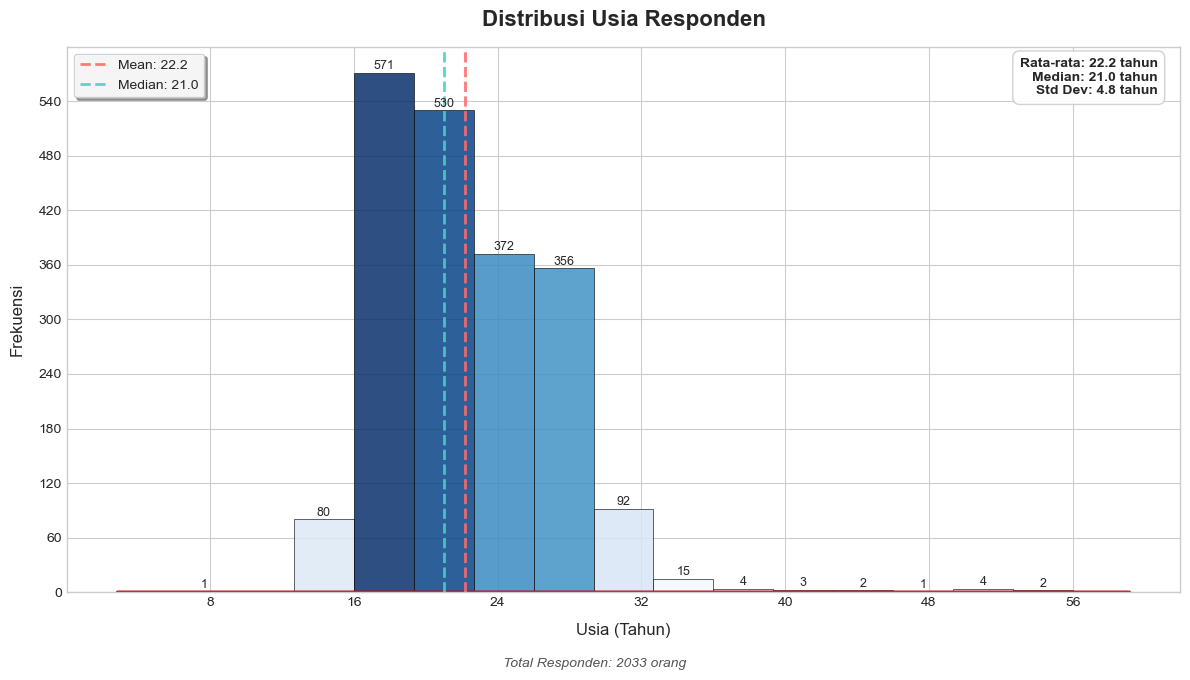

In [19]:
# Exploratory Data Analysis (EDA)

# Distribusi Usia Responden
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

mean_age = df['age'].mean()
median_age = df['age'].median()
std_age = df['age'].std()
total_responden = len(df)

n, bins, patches = ax.hist(df['age'], bins=15, alpha=0.85, 
                           color='#4A90E2', edgecolor='black', linewidth=0.5)

for patch in patches:
    patch.set_facecolor(plt.cm.Blues(patch.get_height()/max(n)))

sns.kdeplot(data=df, x='age', color='#D0021B', linewidth=2.5, ax=ax)

ax.axvline(mean_age, color='#FF6B6B', linestyle='--', linewidth=2, alpha=0.9, label=f'Mean: {mean_age:.1f}')
ax.axvline(median_age, color='#4ECDC4', linestyle='--', linewidth=2, alpha=0.9, label=f'Median: {median_age:.1f}')

ax.set_title('Distribusi Usia Responden', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Usia (Tahun)', fontsize=12, labelpad=10)
ax.set_ylabel('Frekuensi', fontsize=12, labelpad=10)

for i, (count, patch) in enumerate(zip(n, patches)):
    if count > 0:  
        ax.text(patch.get_x() + patch.get_width()/2, count + 0.5, 
                f'{int(count)}', ha='center', va='bottom', fontsize=9)

stats_text = f'Rata-rata: {mean_age:.1f} tahun\nMedian: {median_age:.1f} tahun\nStd Dev: {std_age:.1f} tahun'
ax.text(0.98, 0.98, stats_text, transform=ax.transAxes,
        fontsize=10, fontweight='semibold',
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                 alpha=0.9, edgecolor='#CCCCCC', linewidth=1))

ax.legend(loc='upper left', fontsize=10, frameon=True, 
          fancybox=True, shadow=True, framealpha=0.9)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.figtext(0.5, 0.01, f'Total Responden: {total_responden} orang', 
            ha='center', fontsize=10, style='italic', color='#555555')

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) 
plt.show()

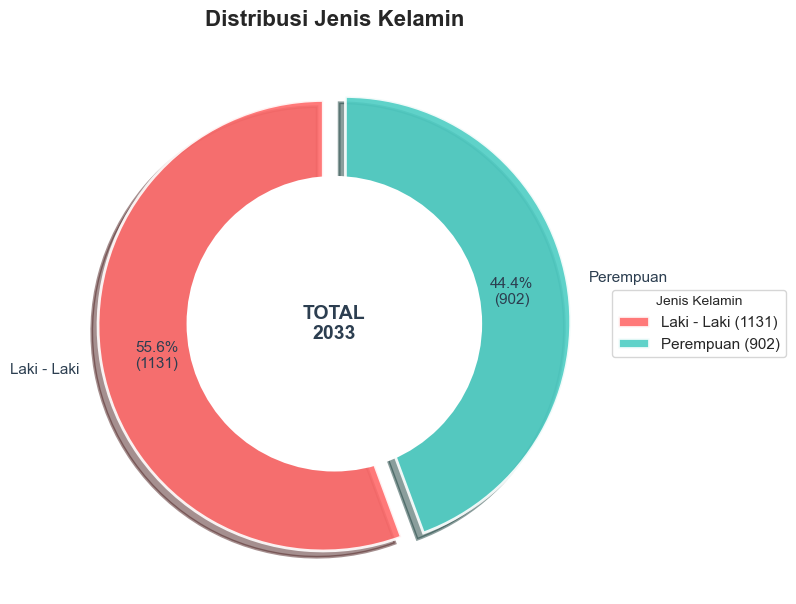

In [20]:
# Distribusi Jenis Kelamin

import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']

if 'Laki-laki' in gender_counts.index:
    labels = ['Laki-laki', 'Perempuan']
    values = [gender_counts.get('Laki-laki', 0), gender_counts.get('Perempuan', 0)]
else:
    labels = gender_counts.index.tolist()
    values = gender_counts.values.tolist()

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    values, labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*sum(values))})',
    colors=colors, startangle=90,
    explode=[0.05, 0.05], shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'alpha': 0.9},
    textprops={'fontsize': 11, 'fontweight': 'medium', 'color': '#2C3E50'},
    pctdistance=0.75
)

centre_circle = plt.Circle((0, 0), 0.65, fc='white', edgecolor='white', linewidth=2)
ax.add_artist(centre_circle)

ax.annotate(
    f'TOTAL\n{sum(values)}', xy=(0, 0), xytext=(0, 0),
    ha='center', va='center', fontsize=14,
    fontweight='bold', color='#2C3E50'
)

ax.set_title('Distribusi Jenis Kelamin', fontsize=16, fontweight='bold', pad=20)

ax.legend(
    wedges, [f'{label} ({value})' for label, value in zip(labels, values)],
    title="Jenis Kelamin", loc="center left",
    bbox_to_anchor=(1, 0.5), fontsize=11, frameon=True
)

ax.set_aspect('equal')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

plt.tight_layout()
plt.show()

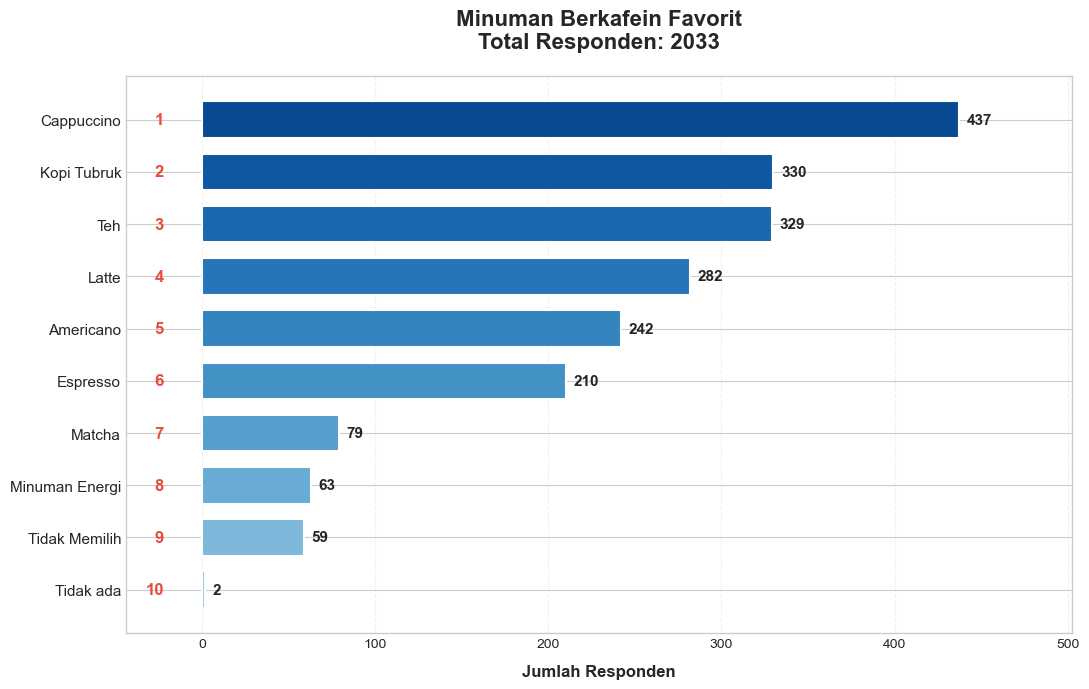

In [21]:
# Minuman Berkafein Favorit

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

drink_counts = df['favorite_caffeine_drink'].value_counts().sort_values(ascending=True)
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(drink_counts)))

fig, ax = plt.subplots(figsize=(11, 7))

bars = ax.barh(drink_counts.index, drink_counts.values, 
               color=colors, edgecolor='white', linewidth=1.5, height=0.7)

for i, (drink, value) in enumerate(zip(drink_counts.index, drink_counts.values)):
    # Ranking number
    ax.text(-max(drink_counts.values)*0.05, i,
            f'{len(drink_counts)-i}',
            ha='right', va='center',
            fontsize=12, fontweight='bold',
            color='#E74C3C')
    
    ax.text(value + max(drink_counts.values)*0.01, i,
            f'{int(value)}',
            ha='left', va='center',
            fontsize=11, fontweight='semibold')

total = drink_counts.sum()
ax.set_title(f'Minuman Berkafein Favorit\nTotal Responden: {total}',
             fontsize=16, fontweight='bold', pad=20)

ax.set_xlabel('Jumlah Responden', fontsize=12, fontweight='semibold', labelpad=10)
ax.set_ylabel('')
ax.set_yticks(range(len(drink_counts)))
ax.set_yticklabels(drink_counts.index, fontsize=11)
ax.xaxis.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.set_xlim([-max(drink_counts.values)*0.1, max(drink_counts.values)*1.15])

plt.tight_layout()
plt.show()

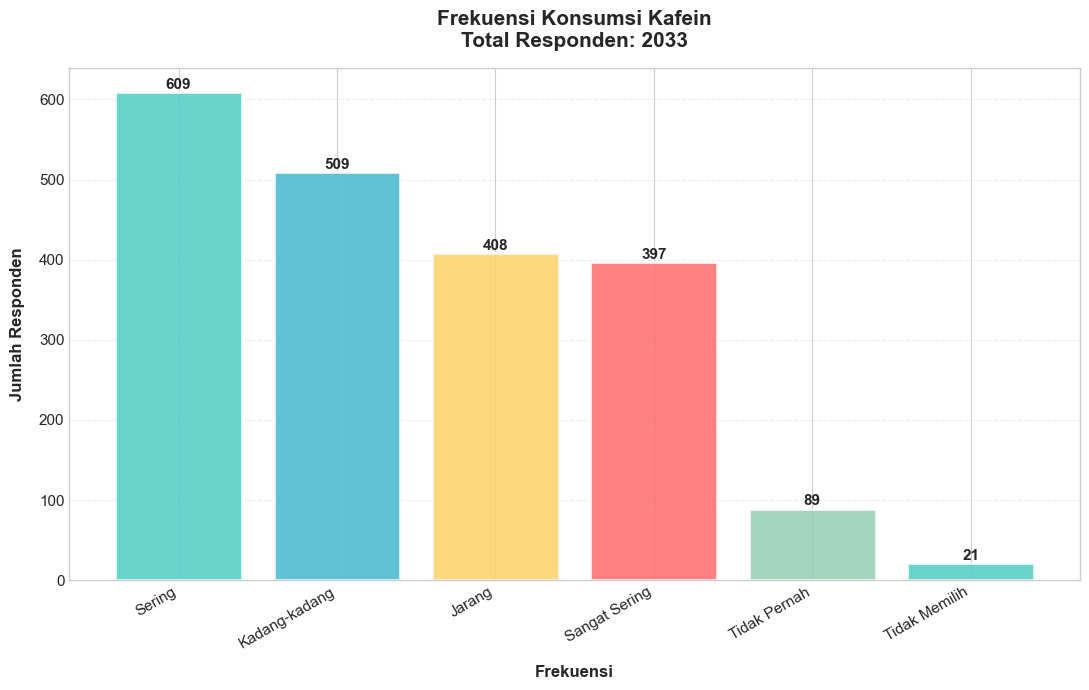

In [22]:
# Frekuensi Konsumsi Kafein

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

freq_counts = df['caffeine_frequency'].value_counts()
colors = ['#4ECDC4', '#45B7D1', '#FFD166', '#FF6B6B', '#96CEB4']

fig, ax = plt.subplots(figsize=(11, 7))
bars = ax.bar(freq_counts.index, freq_counts.values, 
              color=colors[:len(freq_counts)], 
              edgecolor='white', linewidth=2, alpha=0.85)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(height)}', ha='center', va='bottom',
            fontsize=11, fontweight='bold') 

total = freq_counts.sum()
ax.set_title(f'Frekuensi Konsumsi Kafein\nTotal Responden: {total}', 
             fontsize=15, fontweight='bold', pad=15)
ax.set_xlabel('Frekuensi', fontsize=12, fontweight='semibold', labelpad=10)
ax.set_ylabel('Jumlah Responden', fontsize=12, fontweight='semibold', labelpad=10)

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)  # Tambahkan ini

ax.yaxis.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

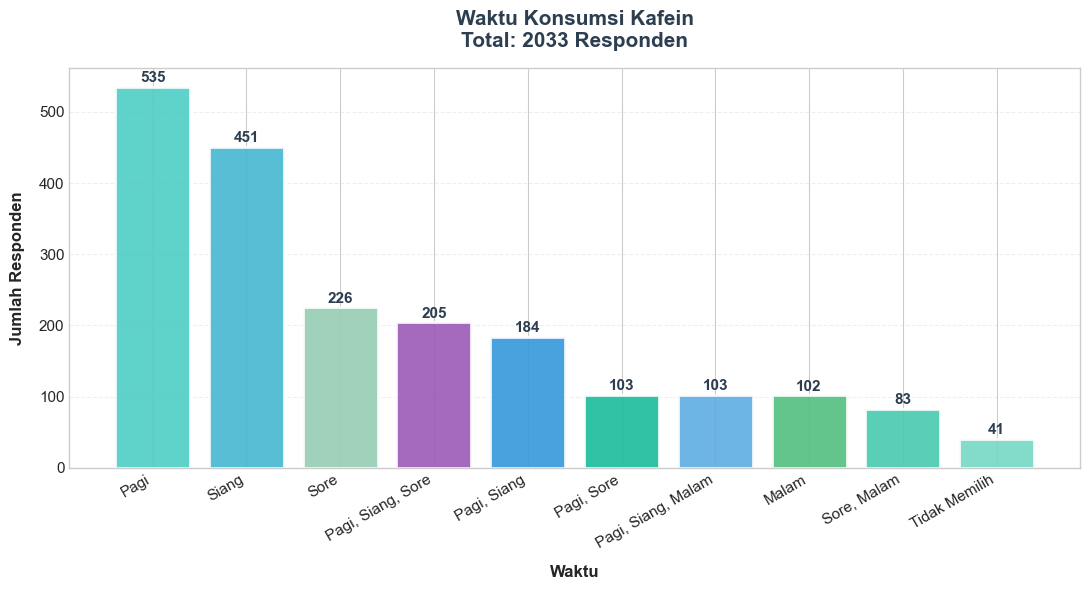

In [23]:
# Waktu Konsumsi Kafein

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
time_counts = df['caffeine_time'].value_counts().sort_values(ascending=False)
colors = ['#4ECDC4', '#45B7D1', '#96CEB4', '#9B59B6', '#3498DB', '#1ABC9C', 
          '#5DADE2', '#52BE80', '#48C9B0', '#76D7C4'][:len(time_counts)]

fig, ax = plt.subplots(figsize=(11, 6))

bars = ax.bar(time_counts.index, time_counts.values,
              color=colors, edgecolor='white', linewidth=2, alpha=0.9)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2,
            f'{int(height)}', ha='center', va='bottom',
            fontsize=11, fontweight='bold', color='#2C3E50')

total = time_counts.sum()
ax.set_title(f'Waktu Konsumsi Kafein\nTotal: {total} Responden',
             fontsize=15, fontweight='bold', pad=15, color='#2C3E50')

ax.set_xlabel('Waktu', fontsize=12, fontweight='semibold', labelpad=10)
ax.set_ylabel('Jumlah Responden', fontsize=12, fontweight='semibold', labelpad=10)

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)

ax.yaxis.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

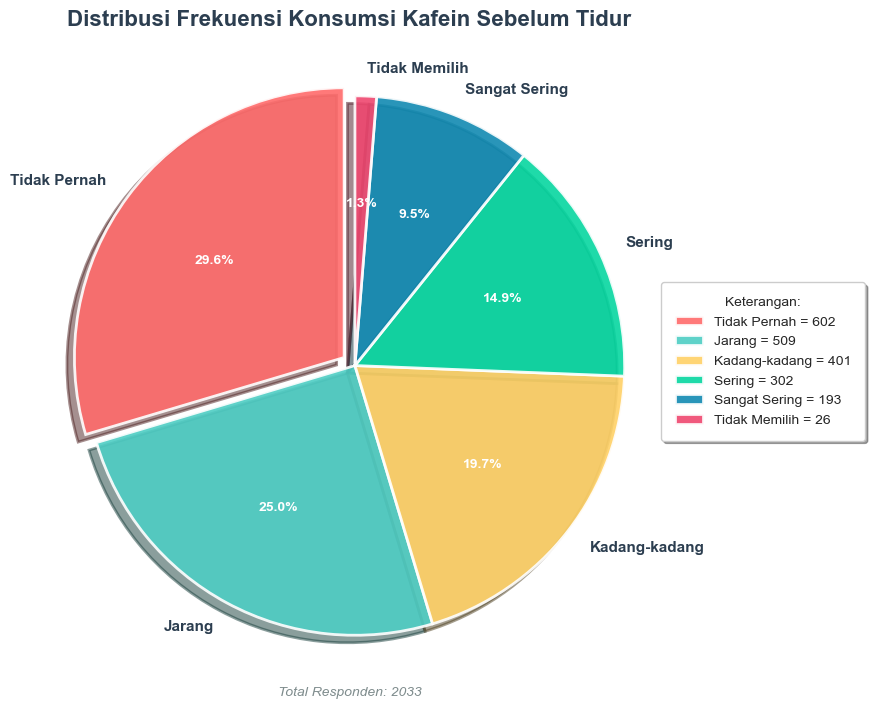

In [24]:
# Konsumsi Kafein Sebelum Tidur

counts = df['caffeine_before_sleep'].value_counts()
labels = [str(i) for i in counts.index]

colors_map = {
    2: ['#FF6B6B','#4ECDC4'],
    3: ['#FF6B6B','#4ECDC4','#95E1D3']
}
explode_map = {
    2: (0.05,0),
    3: (0.05,0,0)
}

colors = colors_map.get(len(counts), ['#FF6B6B','#4ECDC4','#FFD166','#06D6A0','#118AB2','#EF476F'])
explode = explode_map.get(len(counts), (0.05,0,0,0,0,0))

fig, ax = plt.subplots(figsize=(10,8), facecolor='white')
wedges, texts, autotexts = ax.pie(
    counts.values, labels=labels, autopct='%1.1f%%', startangle=90,
    colors=colors[:len(counts)], explode=explode[:len(counts)], shadow=True,
    textprops={'fontsize':11,'fontweight':'bold','color':'#2c3e50'},
    wedgeprops={'edgecolor':'white','linewidth':2,'alpha':0.9}
)

for t in autotexts:
    t.set_color('white'); t.set_fontweight('bold'); t.set_fontsize(10)

legend_labels = [f'{l} = {v}' for l, v in zip(labels, counts.values)]
ax.legend(wedges, legend_labels, title="Keterangan:", loc="center left",
          bbox_to_anchor=(1,0,0.5,1), fontsize=10, frameon=True,
          fancybox=True, shadow=True, borderpad=1)

plt.title("Distribusi Frekuensi Konsumsi Kafein Sebelum Tidur",
          fontsize=16, fontweight='bold', color='#2c3e50', pad=25)

plt.text(0.5, -0.05, f"Total Responden: {len(df)}",
         ha='center', va='center', transform=ax.transAxes,
         fontsize=10, style='italic', color='#7f8c8d')

ax.axis('equal')
plt.tight_layout(rect=[0,0.05,0.85,0.95])
plt.show()

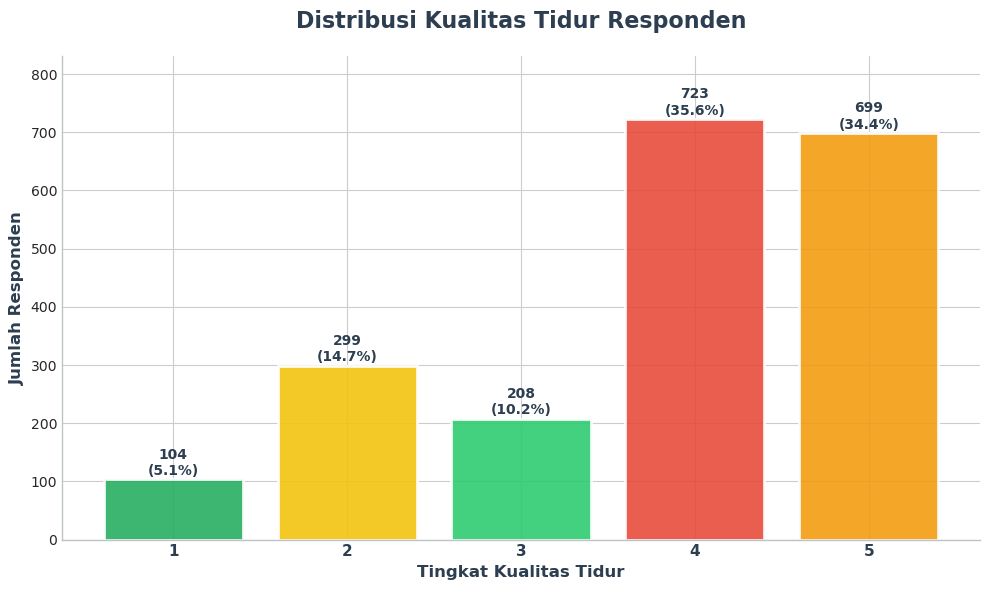

In [25]:
# Kualitas Tidur

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'DejaVu Sans'

sleep_quality_counts = df['sleep_quality'].value_counts()

quality_order = ['Sangat Buruk','Buruk','Cukup','Baik','Sangat Baik']
ordered_labels = [q for q in quality_order if q in sleep_quality_counts.index]
ordered_counts = [sleep_quality_counts[q] for q in ordered_labels]

if len(ordered_counts) != len(sleep_quality_counts):
    ordered_labels = sleep_quality_counts.index.tolist()
    ordered_counts = sleep_quality_counts.values

if len(ordered_counts) == 5:
    colors = ['#e74c3c','#f39c12','#f1c40f','#2ecc71','#27ae60']
elif len(ordered_counts) == 3:
    colors = ['#e74c3c','#f1c40f','#2ecc71']
else:
    colors = plt.cm.viridis(np.linspace(0.2,0.8,len(ordered_counts)))

fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
bars = ax.bar(ordered_labels, ordered_counts, color=colors, edgecolor='white', linewidth=2, alpha=0.9)

for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2, h+(max(ordered_counts)*0.01),
            f'{int(h)}\n({h/len(df)*100:.1f}%)',
            ha='center', fontsize=10, fontweight='bold', color='#2c3e50')

plt.xticks(fontsize=11, fontweight='semibold', color='#2c3e50')
plt.xlabel("Tingkat Kualitas Tidur", fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel("Jumlah Responden", fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylim(0, max(ordered_counts)*1.15)

plt.title("Distribusi Kualitas Tidur Responden",
          fontsize=16, fontweight='bold', color='#2c3e50', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')

plt.tight_layout()
plt.show()

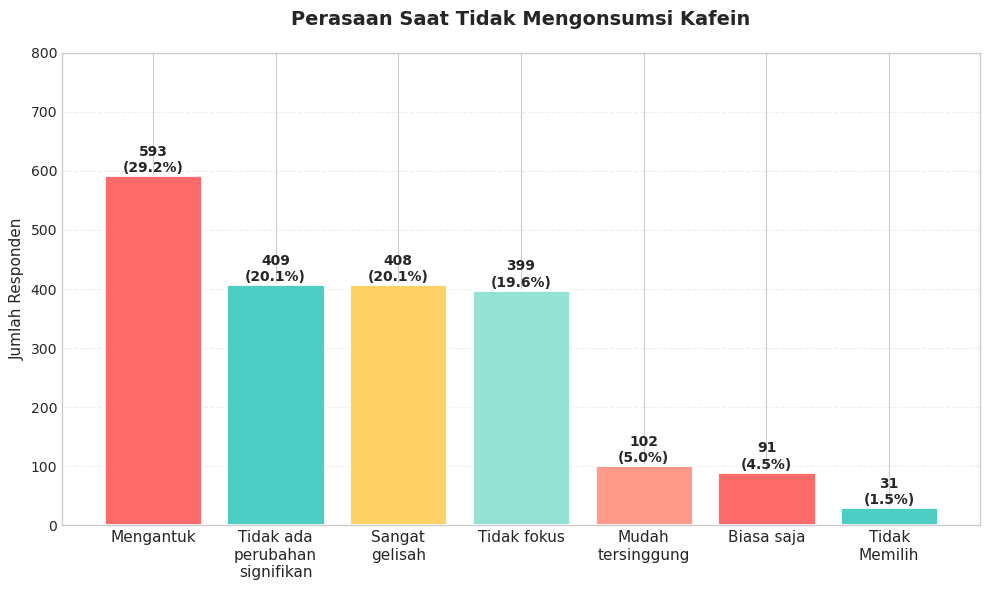

In [26]:
# Perasaan Tanpa Kafein

import textwrap

feeling_counts = df['feeling_without_caffeine'].value_counts()

plt.figure(figsize=(10,6), facecolor='white')
colors = ['#FF6B6B','#4ECDC4','#FFD166','#95E1D3','#FF9A8B']
bars = plt.bar(feeling_counts.index, feeling_counts.values, color=colors, edgecolor='white', linewidth=2)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h + 5,
        f'{int(h)}\n({h/len(df)*100:.1f}%)',
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

wrapped_labels = ['\n'.join(textwrap.wrap(label, 12)) for label in feeling_counts.index]
plt.xticks(range(len(wrapped_labels)), wrapped_labels, fontsize=11)

plt.title('Perasaan Saat Tidak Mengonsumsi Kafein', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Jumlah Responden', fontsize=11)
plt.ylim(0, 800)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

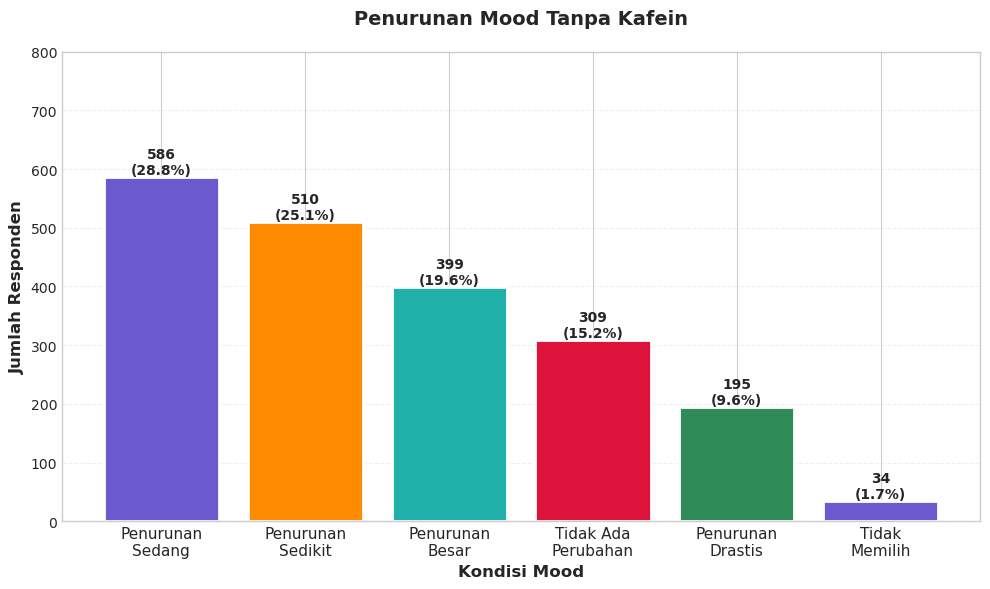

In [27]:
# Mood Tanpa Kafein

import textwrap
import matplotlib.pyplot as plt

mood_counts = df['mood_drop_without_caffeine'].value_counts()

plt.figure(figsize=(10,6), facecolor='white')

colors = ['#6A5ACD', '#FF8C00', '#20B2AA', '#DC143C', '#2E8B57']

bars = plt.bar(
    mood_counts.index,
    mood_counts.values,
    color=colors[:len(mood_counts)],
    edgecolor='white',
    linewidth=2
)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h + 5,
        f'{int(h)}\n({h/len(df)*100:.1f}%)',
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

wrapped_labels = ['\n'.join(textwrap.wrap(label, 12)) for label in mood_counts.index]
plt.xticks(range(len(wrapped_labels)), wrapped_labels, fontsize=11)

plt.title("Penurunan Mood Tanpa Kafein", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Kondisi Mood", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Responden", fontsize=12, fontweight='bold')

plt.ylim(0, 800)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

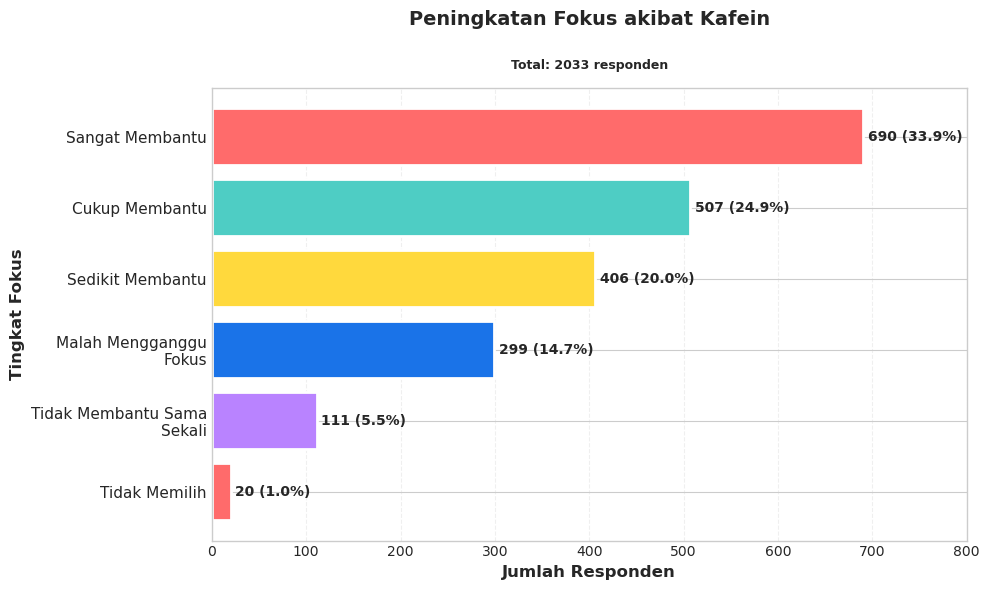

In [28]:
# Dampak Kafein terhadap Fokus

import textwrap
import matplotlib.pyplot as plt

focus_counts = df['focus_boost_caffeine'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6), facecolor='white')

colors_focus = ['#FF6B6B', '#4ECDC4', '#FFD93D', '#1A73E8', '#B983FF']

plt.barh(
    focus_counts.index,
    focus_counts.values,
    color=colors_focus[:len(focus_counts)],
    edgecolor='white',
    linewidth=2
)

for i, v in enumerate(focus_counts.values):
    plt.text(
        v + 5,
        i,
        f'{int(v)} ({v/len(df)*100:.1f}%)',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

wrapped_labels = ['\n'.join(textwrap.wrap(label, 20)) for label in focus_counts.index]
plt.yticks(range(len(wrapped_labels)), wrapped_labels, fontsize=11)

plt.title("Peningkatan Fokus akibat Kafein", fontsize=14, fontweight='bold', pad=45)
plt.xlabel("Jumlah Responden", fontsize=12, fontweight='bold')
plt.ylabel("Tingkat Fokus", fontsize=12, fontweight='bold')

plt.xlim(0, 800)

plt.grid(axis='x', alpha=0.3, linestyle='--')

plt.text(
    0.5, 1.04, f'Total: {len(df)} responden',
    transform=plt.gca().transAxes,
    fontsize=9,
    fontweight='bold',
    ha='center'
)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [29]:
# Feature Engineering: Intensitas Konsumsi Kafein
print("\nMembuat feature engineering: caffeine_intensity...")

# Salin data untuk engineering
df_feat = df.copy()

# Feature Engineering: Intensitas Konsumsi Kafein
if 'caffeine_frequency' in df_feat.columns:
    df_feat['caffeine_intensity'] = df_feat['caffeine_frequency'].replace({
        'Tidak Pernah': 'Rendah',
        'Jarang': 'Rendah',
        'Kadang-kadang': 'Sedang',
        'Sering': 'Tinggi',
        'Sangat Sering': 'Tinggi',
        'Tidak Memilih': 'Tidak Diketahui'
    })


Membuat feature engineering: caffeine_intensity...


In [30]:
# Feature Engineering: Kategorisasi Usia
print("Membuat feature engineering: age_group...")

# Pastikan age numerik
df_feat['age'] = pd.to_numeric(df_feat['age'], errors='coerce')

# Definisi kelompok umur
bins = [0, 25, 55, np.inf]
labels = ['Remaja', 'Dewasa', 'Lansia']

df_feat['age_group'] = pd.cut(
    df_feat['age'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print("Kolom age_group berhasil dibuat")
print("Distribusi age_group:")
print(df_feat['age_group'].value_counts())

Membuat feature engineering: age_group...
Kolom age_group berhasil dibuat
Distribusi age_group:
age_group
Remaja    1554
Dewasa     477
Lansia       2
Name: count, dtype: int64



Visualisasi distribusi age_group...


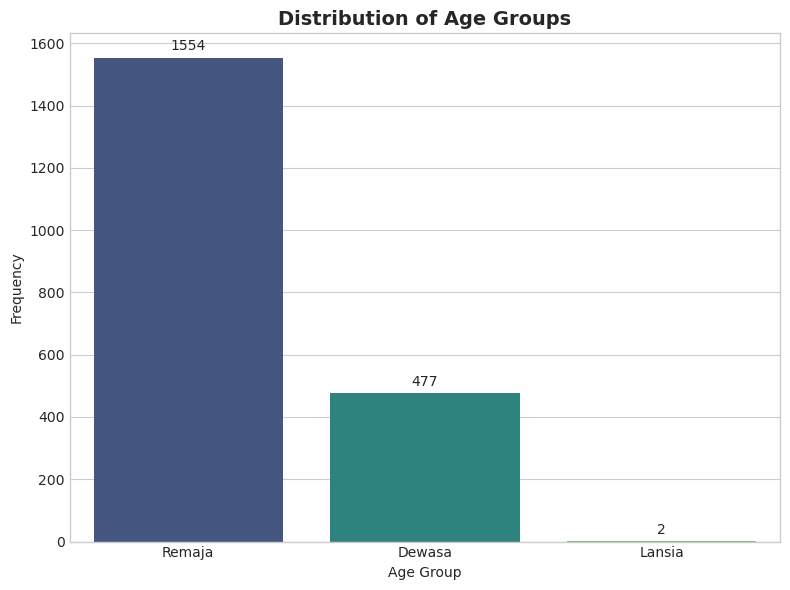

In [31]:
# Visualisasi distribusi age_group
print("\nVisualisasi distribusi age_group...")
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df_feat,
    x='age_group',
    hue='age_group',
    palette='viridis',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)

plt.title('Distribution of Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [32]:

# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')
# Persiapan data untuk modeling
print("\nMempersiapkan data untuk modeling...")

# 1. PREPARE ORIGINAL DATA (SEBELUM ENCODING)
df_original = df_feat.copy()

# 2. PREPARE TARGET VARIABLES
# Target untuk regression: sleep_quality
y_reg = df_original['sleep_quality'].astype(float)

# Target untuk mood classification
mood_map = {
    'Memburuk': 0,
    'Sangat Memburuk': 0,
    'Tidak Berpengaruh': 1,
    'Tidak Memilih': 1,
    'Meningkatkan Sedikit': 2,
    'Meningkatkan Banyak': 2
}
y_mood = (
    df_original['mood_effect_caffeine']
    .map(mood_map)
    .fillna(1)
    .astype(int)
)

# Target untuk focus classification
le_focus = LabelEncoder()
y_focus = le_focus.fit_transform(
    df_original['focus_boost_caffeine'].astype(str)
)

print("Target variables berhasil disiapkan")



Mempersiapkan data untuk modeling...
Target variables berhasil disiapkan


In [33]:
# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')
# 3. PREPARE FEATURES (X) DARI DATA ASLI
print("\nMempersiapkan features...")

# Kolom yang harus dihapus (Leakage & Tidak Relevan)
leak_cols = [
    'sleep_quality',                  # Target utama untuk model Regresi
    'mood_effect_caffeine',           # Target utama untuk model Klasifikasi
    'focus_boost_caffeine',           # Target utama untuk model Klasifikasi
    'mood_effect_class3',             # Dihapus karena ini turunan dari target (leakage)
    'focus_caffeine_ratio',           # Dihapus karena mengandung informasi target (leakage)
    'baseline_mood_score',            # Dihapus karena mengandung informasi target (leakage)
    'name',                           # Dihapus karena ID/Nama tidak memiliki nilai prediksi
    'sleep_difficulty_after_caffeine', # Dihapus sesuai permintaan Anda
    'caffeine_frequency'              # Dihapus karena sudah diwakili oleh caffeine_intensity
]

# Membuat X dari data asli
X_original = df_original.drop(columns=[col for col in leak_cols if col in df_original.columns])

# Konversi semua kolom kategori ke string terlebih dahulu
for col in X_original.select_dtypes(include=['category']).columns:
    X_original[col] = X_original[col].astype(str)

# Identifikasi kolom kategorikal dan numerik
categorical_cols = X_original.select_dtypes(include=['object']).columns
numerical_cols = X_original.select_dtypes(include=[np.number]).columns

print(f"Jumlah fitur kategorikal: {len(categorical_cols)}")
print(f"Jumlah fitur numerik: {len(numerical_cols)}")

# Simpan mapping untuk encoding
categorical_mapping = {}
for col in categorical_cols:
    categorical_mapping[col] = X_original[col].dropna().unique().tolist()

print("Features berhasil disiapkan")


Mempersiapkan features...
Jumlah fitur kategorikal: 15
Jumlah fitur numerik: 1
Features berhasil disiapkan


In [34]:
# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')

# 4. DATA CLEANING DAN HANDLING MISSING VALUES (DI DATA ASLI)
print("\nMembersihkan missing values di features...")

# Untuk kolom numerik di X_original
for col in numerical_cols:
    if X_original[col].isnull().any():
        # Isi NaN dengan median
        X_original[col] = X_original[col].fillna(X_original[col].median())

# Untuk kolom kategorikal di X_original
for col in categorical_cols:
    if X_original[col].isnull().any():
        # Isi NaN dengan mode atau 'Tidak Memilih'
        mode_val = X_original[col].mode()
        if not mode_val.empty:
            X_original[col] = X_original[col].fillna(mode_val.iloc[0])
        else:
            X_original[col] = X_original[col].fillna('Tidak Memilih')

print("Missing values berhasil ditangani")


Membersihkan missing values di features...
Missing values berhasil ditangani


In [35]:
# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')
# 5. ONE-HOT ENCODING UNTUK MODELING
print("\nMelakukan one-hot encoding...")

# Buat versi encoded untuk modeling
X_encoded = pd.get_dummies(X_original, columns=categorical_cols, drop_first=False)

# Handle missing values di X_encoded
# Karena setelah one-hot encoding, semua kolom adalah numerik (0/1)
for col in X_encoded.columns:
    if X_encoded[col].isnull().any():
        X_encoded[col] = X_encoded[col].fillna(0)

# Konversi semua ke float untuk konsistensi
X_encoded = X_encoded.astype(float)

print(f"Shape setelah encoding: {X_encoded.shape}")
print(f"Jumlah fitur setelah one-hot encoding: {X_encoded.shape[1]}")


Melakukan one-hot encoding...
Shape setelah encoding: (2033, 97)
Jumlah fitur setelah one-hot encoding: 97


In [36]:
# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')

# 6. SPLIT DATA
print("\nMembagi data menjadi training dan testing...")

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_encoded, y_reg, test_size=0.2, random_state=42
)

X_train_mood, X_test_mood, y_train_mood, y_test_mood = train_test_split(
    X_encoded, y_mood, test_size=0.2, random_state=42, stratify=y_mood
)

X_train_focus, X_test_focus, y_train_focus, y_test_focus = train_test_split(
    X_encoded, y_focus, test_size=0.2, random_state=42, stratify=y_focus
)

print(f"Training size (regression): {X_train_reg.shape}")
print(f"Testing size (regression): {X_test_reg.shape}")



Membagi data menjadi training dan testing...
Training size (regression): (1626, 97)
Testing size (regression): (407, 97)


In [37]:
# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')

# 7. TRAIN MODELS
print("\nMelatih model...")

# Regression model
print("Melatih model regresi...")
reg_model = RandomForestRegressor(
    n_estimators=200, max_depth=10, random_state=42
)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Mood Classifier
print("Melatih model klasifikasi mood...")
clf_mood = RandomForestClassifier(
    n_estimators=200, max_depth=10,
    class_weight='balanced', random_state=42
)
clf_mood.fit(X_train_mood, y_train_mood)
y_pred_mood = clf_mood.predict(X_test_mood)

# Focus Classifier
print("Melatih model klasifikasi fokus...")
clf_focus = RandomForestClassifier(
    n_estimators=200, max_depth=10,
    class_weight='balanced', random_state=42
)
clf_focus.fit(X_train_focus, y_train_focus)
y_pred_focus = clf_focus.predict(X_test_focus)

print("Semua model berhasil dilatih")


Melatih model...
Melatih model regresi...
Melatih model klasifikasi mood...
Melatih model klasifikasi fokus...
Semua model berhasil dilatih


In [38]:
# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')
# 8. CALCULATE FEATURE IMPORTANCE (CORRECT WAY)
print("\nMenghitung feature importance...")

def aggregate_feature_importance(model, X_encoded_cols, categorical_mapping, X_original_cols):
    """
    Agregasi feature importance dari one-hot encoded ke fitur asli
    """
    # Get importance dari model
    encoded_importance = pd.DataFrame({
        'feature': X_encoded_cols,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Agregasi untuk fitur asli
    original_importance = {}
    
    # 1. Untuk fitur kategorikal: jumlahkan semua kolom one-hot
    for feature in categorical_mapping.keys():
        # Cari semua kolom one-hot untuk fitur ini
        one_hot_cols = [col for col in encoded_importance['feature'] 
                       if col.startswith(feature + '_')]
        
        if one_hot_cols:
            # Jumlahkan importance
            total_importance = encoded_importance[
                encoded_importance['feature'].isin(one_hot_cols)
            ]['importance'].sum()
            original_importance[feature] = total_importance
    
    # 2. Untuk fitur numerik: ambil langsung
    numerical_features = [col for col in X_original_cols 
                         if col not in categorical_mapping]
    
    for feature in numerical_features:
        if feature in encoded_importance['feature'].values:
            importance = encoded_importance[
                encoded_importance['feature'] == feature
            ]['importance'].values[0]
            original_importance[feature] = importance
    
    # Buat DataFrame
    result_df = pd.DataFrame({
        'feature': list(original_importance.keys()),
        'importance': list(original_importance.values())
    }).sort_values('importance', ascending=False)
    
    return result_df, encoded_importance

# Get feature importance untuk regression model
original_importance_df, encoded_importance_df = aggregate_feature_importance(
    reg_model, 
    X_train_reg.columns.tolist(),
    categorical_mapping,
    X_original.columns.tolist()
)

print("Feature importance berhasil dihitung")



Menghitung feature importance...
Feature importance berhasil dihitung


In [39]:
# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')

# 9. EVALUATION
print("\n" + "="*50)
print("EVALUASI MODEL")
print("="*50)

print("\n=== Regression: Sleep Quality ===")
reg_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
reg_r2 = r2_score(y_test_reg, y_pred_reg)
print(f"RMSE: {reg_rmse:.4f}")
print(f"R²  : {reg_r2:.4f}")

print("\n=== Top 10 Fitur Paling Berpengaruh ===")
print("Fitur\tImportance")
for idx, row in original_importance_df.head(10).iterrows():
    print(f"{row['feature']}\t{row['importance']:.6f}")

print("\n=== Classification: Mood Effect ===")
print(classification_report(
    y_test_mood,
    y_pred_mood,
    digits=4,
    zero_division=0
))

print("\n=== Classification: Focus Boost ===")
print(classification_report(
    y_test_focus,
    y_pred_focus,
    target_names=le_focus.classes_,
    digits=4,
    zero_division=0
))


EVALUASI MODEL

=== Regression: Sleep Quality ===
RMSE: 0.2349
R²  : 0.9634

=== Top 10 Fitur Paling Berpengaruh ===
Fitur	Importance
digestion_issues_from_caffeine	0.425266
physical_side_effects_impact	0.326278
stress_effect_caffeine	0.090121
concentration_without_caffeine	0.049511
caffeine_before_sleep	0.036063
mood_drop_without_caffeine	0.029953
confidence_boost_from_caffeine	0.011666
caffeine_reason	0.011312
work_duration_increase	0.006827
favorite_caffeine_drink	0.003814

=== Classification: Mood Effect ===
              precision    recall  f1-score   support

           0     0.1538    0.0690    0.0952        58
           1     0.1379    0.0825    0.1032        97
           2     0.5882    0.7540    0.6609       252

    accuracy                         0.4963       407
   macro avg     0.2933    0.3018    0.2864       407
weighted avg     0.4190    0.4963    0.4474       407


=== Classification: Focus Boost ===
                            precision    recall  f1-score   sup


Visualisasi feature importance...


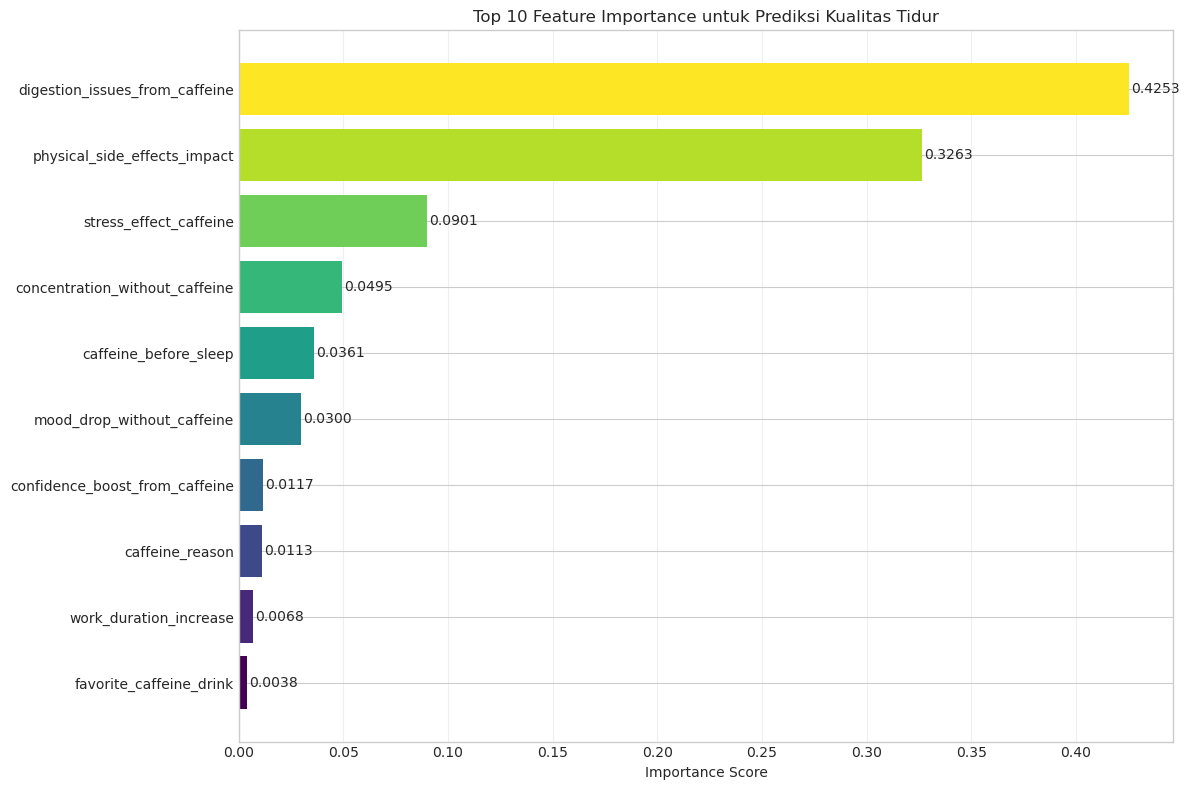

In [40]:
# ============================================
# IMPORT SEMUA LIBRARY YANG DIPERLUKAN
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pickle
import warnings
warnings.filterwarnings('ignore')
# Visualisasi Feature Importance
print("\nVisualisasi feature importance...")

top_n = 10
top_features = original_importance_df.head(top_n)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, top_n))
bars = plt.barh(range(top_n), top_features['importance'][::-1], color=colors)
plt.yticks(range(top_n), top_features['feature'][::-1])
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Feature Importance untuk Prediksi Kualitas Tidur')
plt.grid(axis='x', alpha=0.3)

# Tambahkan nilai importance pada bar
for i, (bar, importance) in enumerate(zip(bars, top_features['importance'][::-1])):
    plt.text(importance + 0.001, bar.get_y() + bar.get_height()/2,
            f'{importance:.4f}', ha='left', va='center')

plt.tight_layout()
plt.show()


In [41]:

# Cek korelasi dengan sleep_quality
correlations = {}
for col in X_original.columns:
    if col in df_original.columns and col != 'sleep_quality':
        # Untuk kategorikal, gunakan Cramer's V atau chi-square
        if X_original[col].dtype == 'object':
            from scipy.stats import chi2_contingency
            contingency_table = pd.crosstab(df_original[col], df_original['sleep_quality'])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape) - 1
            cramers_v = np.sqrt(chi2 / (n * min_dim))
            correlations[col] = cramers_v
        else:
            # Untuk numerik, gunakan Pearson
            corr = df_original[[col, 'sleep_quality']].corr().iloc[0,1]
            correlations[col] = abs(corr)

# Sort by correlation
corr_df = pd.DataFrame(correlations.items(), columns=['feature', 'correlation'])
corr_df = corr_df.sort_values('correlation', ascending=False)
print("Top 10 fitur dengan korelasi tertinggi:")
print(corr_df.head(10))

Top 10 fitur dengan korelasi tertinggi:
                           feature  correlation
8           stress_effect_caffeine     0.629748
12    physical_side_effects_impact     0.596227
13  digestion_issues_from_caffeine     0.589586
11          work_duration_increase     0.492352
10  concentration_without_caffeine     0.397455
9   confidence_boost_from_caffeine     0.395363
6                  caffeine_reason     0.340753
4       mood_drop_without_caffeine     0.310202
5            caffeine_before_sleep     0.306715
14              caffeine_intensity     0.223644


In [42]:
# 10. SAVE MODEL RESULTS FOR STREAMLIT
print("\nMenyimpan hasil untuk Streamlit...")

results = {
    'models': {
        'regression': reg_model,
        'mood_classifier': clf_mood,
        'focus_classifier': clf_focus
    },
    'data': {
        'X_original': X_original,
        'X_encoded': X_encoded,
        'X_train_reg': X_train_reg, 'X_test_reg': X_test_reg,
        'y_train_reg': y_train_reg, 'y_test_reg': y_test_reg,
        'X_train_mood': X_train_mood, 'X_test_mood': X_test_mood,
        'y_train_mood': y_train_mood, 'y_test_mood': y_test_mood,
        'X_train_focus': X_train_focus, 'X_test_focus': X_test_focus,
        'y_train_focus': y_train_focus, 'y_test_focus': y_test_focus,
        'y_pred_reg': y_pred_reg,
        'y_pred_mood': y_pred_mood,
        'y_pred_focus': y_pred_focus
    },
    'metrics': {
        'regression': {
            'rmse': reg_rmse,
            'r2': reg_r2
        },
        'mood_classification': classification_report(y_test_mood, y_pred_mood, output_dict=True),
        'focus_classification': classification_report(y_test_focus, y_pred_focus, output_dict=True)
    },
    'feature_importance': {
        'original': original_importance_df,  # Fitur asli
        'encoded': encoded_importance_df     # One-hot encoded
    },
    'mappings': {
        'categorical_mapping': categorical_mapping,
        'focus_encoder': le_focus
    },
    'feature_names': X_train_reg.columns.tolist(),
    'df_original': df_original  # Untuk input form nanti
}

print("\n" + "="*50)
print("PEMROSESAN DATA SELESAI!")
print("="*50)
print(f"Model berhasil dilatih dengan {X_encoded.shape[1]} fitur")
print(f"R² Score: {reg_r2:.4f}")
print(f"RMSE: {reg_rmse:.4f}")

# Simpan results untuk Streamlit (opsional)
import pickle
with open('model_results.pkl', 'wb') as f:
    pickle.dump(results, f)

print("\nHasil model disimpan ke 'model_results.pkl' untuk Streamlit")


Menyimpan hasil untuk Streamlit...

PEMROSESAN DATA SELESAI!
Model berhasil dilatih dengan 97 fitur
R² Score: 0.9634
RMSE: 0.2349

Hasil model disimpan ke 'model_results.pkl' untuk Streamlit



VISUALISASI MODEL REGRESI


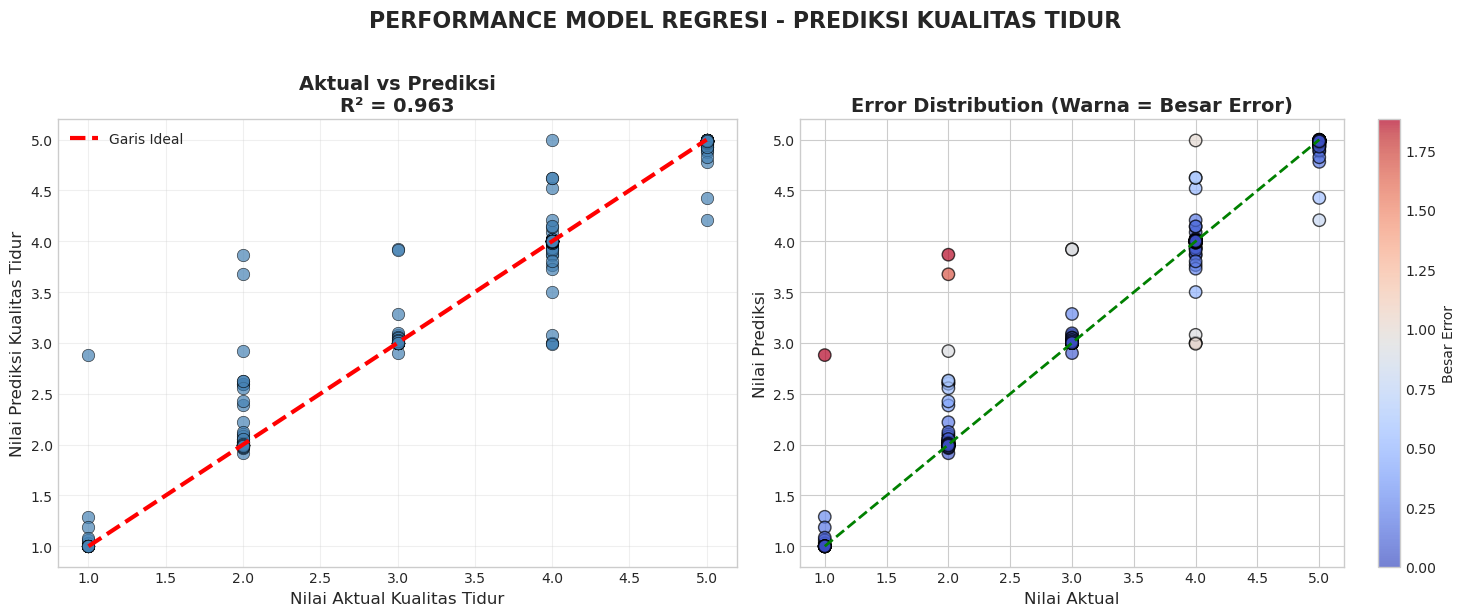

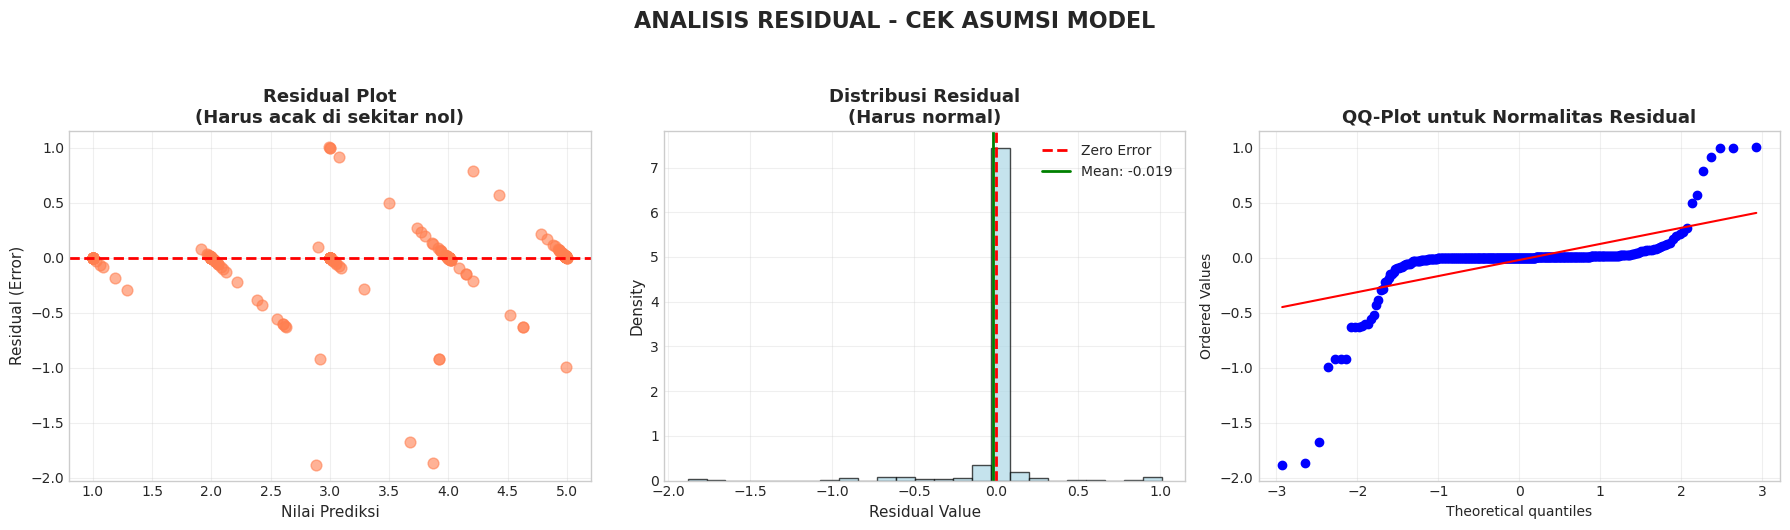


📊 METRICS DASHBOARD REGRESI:
----------------------------------------
   Metric    Nilai                              Interpretasi
 R² Score 0.963427 96.3% variasi data dapat dijelaskan model
     RMSE 0.234856               Rata-rata error: 0.235 poin
      MAE 0.068690            Error absolut rata-rata: 0.069
Max Error 1.880589                     Error terbesar: 1.881
Std Error 0.234378                 Konsistensi error: ±0.234


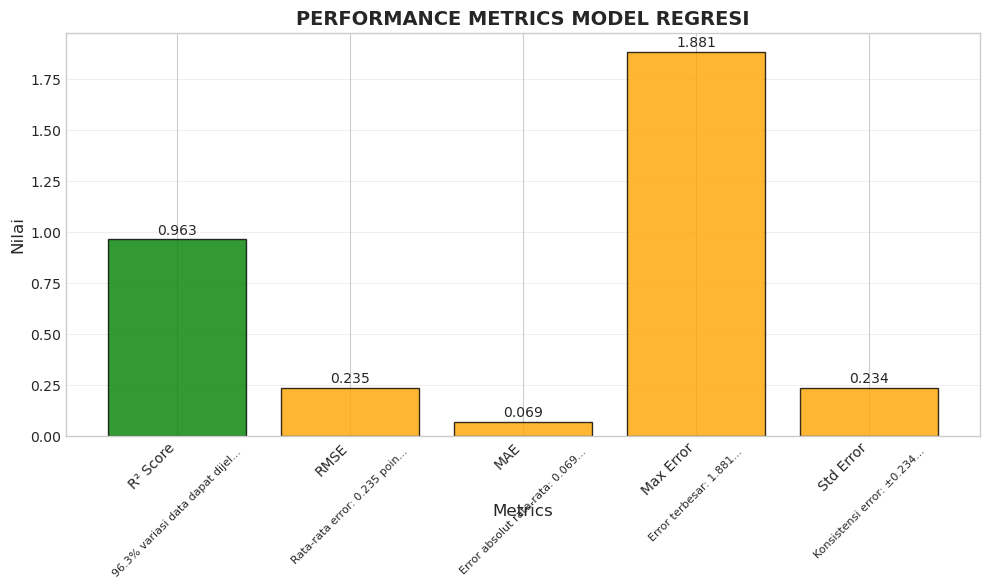

In [43]:
# ============================================
# VISUALISASI MODEL REGRESI (MUDAH DIPAHAMI)
# ============================================

print("\n" + "="*50)
print("VISUALISASI MODEL REGRESI")
print("="*50)

# 1. ACTUAL vs PREDICTED (Plot Utama)
fig1, axes1 = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter plot dengan garis ideal
axes1[0].scatter(y_test_reg, y_pred_reg, alpha=0.7, color='steelblue', 
                edgecolors='black', linewidth=0.5, s=80)
min_val = min(y_test_reg.min(), y_pred_reg.min())
max_val = max(y_test_reg.max(), y_pred_reg.max())
axes1[0].plot([min_val, max_val], [min_val, max_val], 
             'r--', lw=3, label='Garis Ideal')
axes1[0].set_xlabel('Nilai Aktual Kualitas Tidur', fontsize=12)
axes1[0].set_ylabel('Nilai Prediksi Kualitas Tidur', fontsize=12)
axes1[0].set_title(f'Aktual vs Prediksi\nR² = {reg_r2:.3f}', fontsize=14, fontweight='bold')
axes1[0].grid(True, alpha=0.3)
axes1[0].legend()

# Plot 2: Error distribution dengan color coding
errors = y_test_reg - y_pred_reg
abs_errors = np.abs(errors)
sc = axes1[1].scatter(y_test_reg, y_pred_reg, c=abs_errors, 
                     cmap='coolwarm', alpha=0.7, s=80, edgecolors='black')
axes1[1].plot([min_val, max_val], [min_val, max_val], 'g--', lw=2)
axes1[1].set_xlabel('Nilai Aktual', fontsize=12)
axes1[1].set_ylabel('Nilai Prediksi', fontsize=12)
axes1[1].set_title('Error Distribution (Warna = Besar Error)', fontsize=14, fontweight='bold')
plt.colorbar(sc, ax=axes1[1], label='Besar Error')

plt.suptitle('PERFORMANCE MODEL REGRESI - PREDIKSI KUALITAS TIDUR', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 2. RESIDUAL ANALYSIS
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Residuals vs Predicted
axes2[0].scatter(y_pred_reg, errors, alpha=0.6, color='coral', s=60)
axes2[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes2[0].set_xlabel('Nilai Prediksi', fontsize=11)
axes2[0].set_ylabel('Residual (Error)', fontsize=11)
axes2[0].set_title('Residual Plot\n(Harus acak di sekitar nol)', fontsize=13, fontweight='bold')
axes2[0].grid(True, alpha=0.3)

# Plot 2: Histogram residuals
axes2[1].hist(errors, bins=25, edgecolor='black', alpha=0.7, 
             color='lightblue', density=True)
axes2[1].axvline(x=0, color='red', linestyle='--', linewidth=2, 
                label='Zero Error')
axes2[1].axvline(x=errors.mean(), color='green', linestyle='-', 
                linewidth=2, label=f'Mean: {errors.mean():.3f}')
axes2[1].set_xlabel('Residual Value', fontsize=11)
axes2[1].set_ylabel('Density', fontsize=11)
axes2[1].set_title('Distribusi Residual\n(Harus normal)', fontsize=13, fontweight='bold')
axes2[1].legend()
axes2[1].grid(True, alpha=0.3)

# Plot 3: QQ-plot untuk cek normalitas
from scipy import stats
stats.probplot(errors, dist="norm", plot=axes2[2])
axes2[2].set_title('QQ-Plot untuk Normalitas Residual', fontsize=13, fontweight='bold')
axes2[2].grid(True, alpha=0.3)

plt.suptitle('ANALISIS RESIDUAL - CEK ASUMSI MODEL', 
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# 3. PERFORMANCE METRICS DASHBOARD
print("\n📊 METRICS DASHBOARD REGRESI:")
print("-" * 40)

metrics_data = {
    'Metric': ['R² Score', 'RMSE', 'MAE', 'Max Error', 'Std Error'],
    'Nilai': [reg_r2, reg_rmse, np.mean(abs_errors), 
             abs_errors.max(), errors.std()],
    'Interpretasi': [
        f'{reg_r2*100:.1f}% variasi data dapat dijelaskan model',
        f'Rata-rata error: {reg_rmse:.3f} poin',
        f'Error absolut rata-rata: {np.mean(abs_errors):.3f}',
        f'Error terbesar: {abs_errors.max():.3f}',
        f'Konsistensi error: ±{errors.std():.3f}'
    ]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string(index=False))

# Visual metrics
fig3, ax3 = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(metrics_data['Metric']))
colors = ['green' if m == 'R² Score' else 'orange' for m in metrics_data['Metric']]

bars = ax3.bar(x_pos, metrics_data['Nilai'], color=colors, alpha=0.8, edgecolor='black')
ax3.set_xlabel('Metrics', fontsize=12)
ax3.set_ylabel('Nilai', fontsize=12)
ax3.set_title('PERFORMANCE METRICS MODEL REGRESI', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(metrics_data['Metric'], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Anotasi
for bar, nilai, interpretasi in zip(bars, metrics_data['Nilai'], metrics_data['Interpretasi']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{nilai:.3f}', ha='center', va='bottom', fontsize=10)
    # Tambah interpretasi di bawah
    ax3.text(bar.get_x() + bar.get_width()/2., -0.05,
             interpretasi[:30]+'...', ha='center', va='top', 
             fontsize=8, rotation=45)

plt.tight_layout()
plt.show()

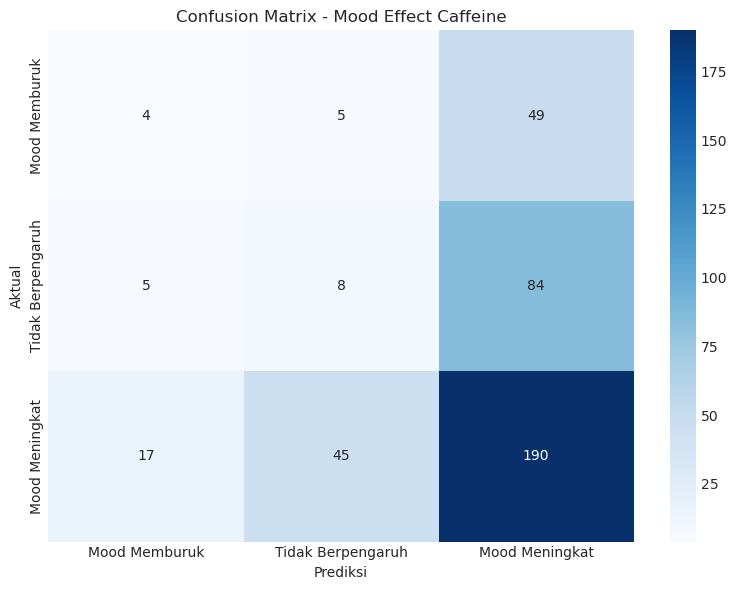

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prediksi
y_pred_mood = clf_mood.predict(X_test_mood)

# Confusion Matrix
cm_mood = confusion_matrix(y_test_mood, y_pred_mood)

# Label kelas sesuai mapping manual
class_labels = [
    'Mood Memburuk',        # 0
    'Tidak Berpengaruh',    # 1
    'Mood Meningkat'        # 2
]

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_mood,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.title("Confusion Matrix - Mood Effect Caffeine")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()


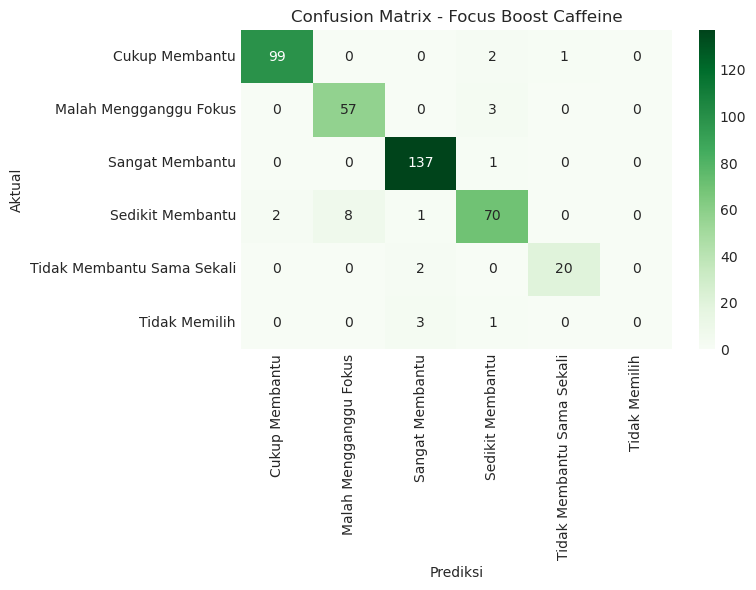

In [45]:
y_pred_focus = clf_focus.predict(X_test_focus)

cm_focus = confusion_matrix(y_test_focus, y_pred_focus)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm_focus,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=le_focus.classes_,
    yticklabels=le_focus.classes_
)
plt.title("Confusion Matrix - Focus Boost Caffeine")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()


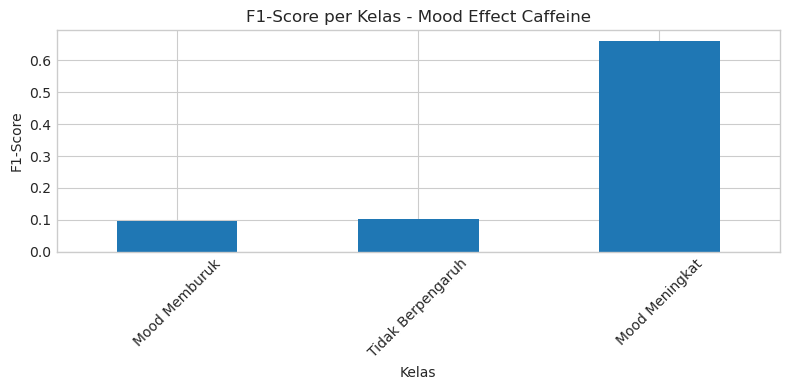

In [46]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Label kelas sesuai mapping manual
class_labels = [
    'Mood Memburuk',        # 0
    'Tidak Berpengaruh',    # 1
    'Mood Meningkat'        # 2
]

# Ambil classification report sebagai dict
report_mood = classification_report(
    y_test_mood,
    y_pred_mood,
    target_names=class_labels,
    output_dict=True,
    zero_division=0
)

# Convert ke DataFrame
df_report_mood = pd.DataFrame(report_mood).transpose()

# Plot F1-score per kelas
plt.figure(figsize=(8,4))
df_report_mood.loc[class_labels, 'f1-score'].plot(kind='bar')
plt.title("F1-Score per Kelas - Mood Effect Caffeine")
plt.ylabel("F1-Score")
plt.xlabel("Kelas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


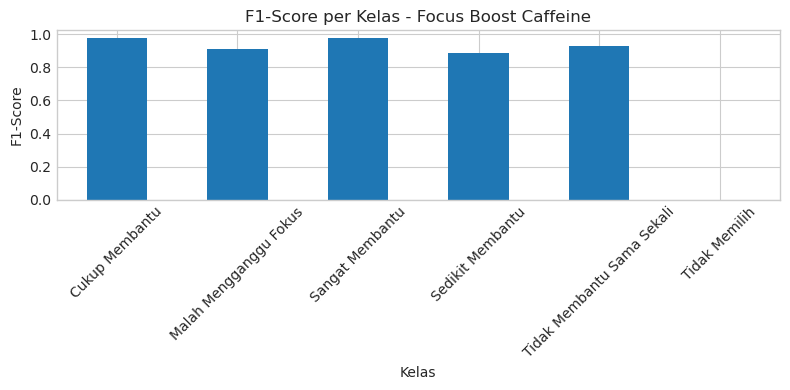

In [47]:
report_focus = classification_report(
    y_test_focus,
    y_pred_focus,
    target_names=le_focus.classes_,
    output_dict=True,
    zero_division=0
)

df_report_focus = pd.DataFrame(report_focus).transpose()

plt.figure(figsize=(8,4))
df_report_focus.loc[le_focus.classes_, 'f1-score'].plot(kind='bar')
plt.title("F1-Score per Kelas - Focus Boost Caffeine")
plt.ylabel("F1-Score")
plt.xlabel("Kelas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



PERBANDINGAN FEATURE IMPORTANCE

📊 Menghitung feature importance untuk model klasifikasi mood...
📊 Menghitung feature importance untuk model klasifikasi fokus...

TOP 10 FEATURE IMPORTANCE PER MODEL

🔵 REGRESI - Prediksi Kualitas Tidur:
--------------------------------------------------
 1. digestion_issues_from_caffeine      0.4253
 2. physical_side_effects_impact        0.3263
 3. stress_effect_caffeine              0.0901
 4. concentration_without_caffeine      0.0495
 5. caffeine_before_sleep               0.0361
 6. mood_drop_without_caffeine          0.0300
 7. confidence_boost_from_caffeine      0.0117
 8. caffeine_reason                     0.0113
 9. work_duration_increase              0.0068
10. favorite_caffeine_drink             0.0038

🟡 KLASIFIKASI - Prediksi Mood Effect:
--------------------------------------------------
 1. caffeine_time                       0.1279
 2. favorite_caffeine_drink             0.1235
 3. feeling_without_caffeine            0.0969
 4. age   

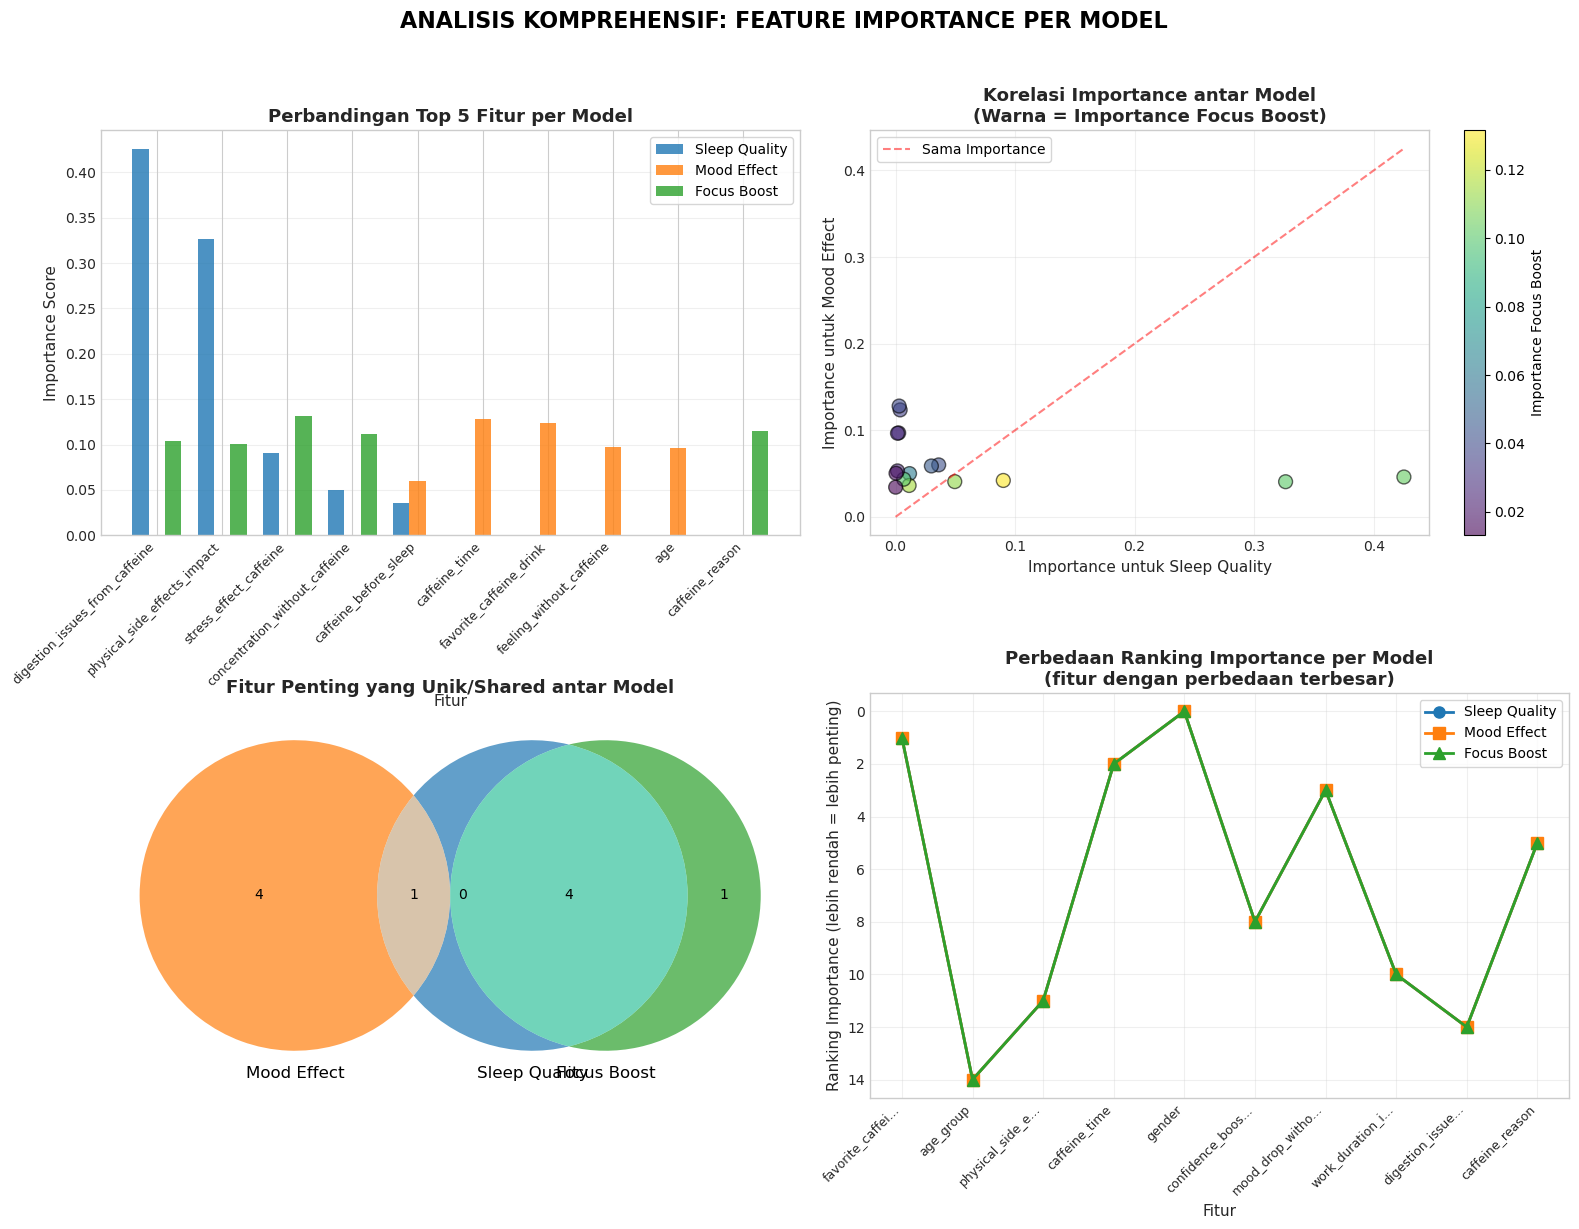


📈 INSIGHT DARI PERBANDINGAN FEATURE IMPORTANCE

🔗 KORELASI IMPORTANCE SCORES:
   Sleep Quality vs Mood Effect: -0.297
   Sleep Quality vs Focus Boost: 0.494
   Mood Effect vs Focus Boost: -0.491

🎯 FITUR YANG PENTING UNTUK SEMUA MODEL:
   Fitur yang konsisten penting:
   • physical_side_effects_impact: Sleep=0.326, Mood=0.041, Focus=0.101
   • mood_drop_without_caffeine: Sleep=0.030, Mood=0.059, Focus=0.046
   • digestion_issues_from_caffeine: Sleep=0.425, Mood=0.046, Focus=0.103
   • stress_effect_caffeine: Sleep=0.090, Mood=0.042, Focus=0.132
   • concentration_without_caffeine: Sleep=0.050, Mood=0.041, Focus=0.112

🎯 FITUR UNIK PER MODEL:
   Untuk Sleep Quality:
   • digestion_issues_from_caffeine: 0.425
   • physical_side_effects_impact: 0.326

   Untuk Mood Effect:
   • caffeine_time: 0.128
   • favorite_caffeine_drink: 0.123
   • feeling_without_caffeine: 0.097

📌 KESIMPULAN:
1. Feature importance BERBEDA untuk regresi dan klasifikasi
2. Fitur yang mempengaruhi kualitas tidur ≠ 

In [48]:
# ============================================
# BANDINGKAN FEATURE IMPORTANCE REGRESI vs KLASIFIKASI
# ============================================

print("\n" + "="*60)
print("PERBANDINGAN FEATURE IMPORTANCE")
print("="*60)

# 1. Dapatkan feature importance untuk mood classifier
print("\n📊 Menghitung feature importance untuk model klasifikasi mood...")

# Fungsi untuk aggregate feature importance (sama seperti regresi)
def get_classification_feature_importance(model, X_cols, categorical_mapping, X_original_cols):
    """Agregasi feature importance untuk classifier"""
    encoded_importance = pd.DataFrame({
        'feature': X_cols,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    original_importance = {}
    
    # Agregasi fitur kategorikal
    for feature in categorical_mapping.keys():
        one_hot_cols = [col for col in encoded_importance['feature'] 
                       if col.startswith(feature + '_')]
        if one_hot_cols:
            total_importance = encoded_importance[
                encoded_importance['feature'].isin(one_hot_cols)
            ]['importance'].sum()
            original_importance[feature] = total_importance
    
    # Fitur numerik
    numerical_features = [col for col in X_original_cols 
                         if col not in categorical_mapping]
    
    for feature in numerical_features:
        if feature in encoded_importance['feature'].values:
            importance = encoded_importance[
                encoded_importance['feature'] == feature
            ]['importance'].values[0]
            original_importance[feature] = importance
    
    result_df = pd.DataFrame({
        'feature': list(original_importance.keys()),
        'importance': list(original_importance.values())
    }).sort_values('importance', ascending=False)
    
    return result_df

# Get importance untuk mood classifier
mood_importance_df = get_classification_feature_importance(
    clf_mood, 
    X_train_mood.columns.tolist(),
    categorical_mapping,
    X_original.columns.tolist()
)

# 2. Get importance untuk focus classifier
print("📊 Menghitung feature importance untuk model klasifikasi fokus...")
focus_importance_df = get_classification_feature_importance(
    clf_focus, 
    X_train_focus.columns.tolist(),
    categorical_mapping,
    X_original.columns.tolist()
)

# 3. Bandingkan Top 10 masing-masing
print("\n" + "="*60)
print("TOP 10 FEATURE IMPORTANCE PER MODEL")
print("="*60)

print("\n🔵 REGRESI - Prediksi Kualitas Tidur:")
print("-" * 50)
reg_top10 = original_importance_df.head(10).reset_index(drop=True)
for i, row in reg_top10.iterrows():
    print(f"{i+1:2d}. {row['feature']:35s} {row['importance']:.4f}")

print("\n🟡 KLASIFIKASI - Prediksi Mood Effect:")
print("-" * 50)
mood_top10 = mood_importance_df.head(10).reset_index(drop=True)
for i, row in mood_top10.iterrows():
    print(f"{i+1:2d}. {row['feature']:35s} {row['importance']:.4f}")

print("\n🟢 KLASIFIKASI - Prediksi Focus Boost:")
print("-" * 50)
focus_top10 = focus_importance_df.head(10).reset_index(drop=True)
for i, row in focus_top10.iterrows():
    print(f"{i+1:2d}. {row['feature']:35s} {row['importance']:.4f}")

# 4. Visualisasi Perbandingan
print("\n" + "="*60)
print("VISUALISASI PERBANDINGAN FEATURE IMPORTANCE")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.style.use('default')  # Reset untuk visual yang lebih clear

# Plot 1: Top 5 masing-masing model
ax1 = axes[0, 0]
top_n = 5

# Gabungkan data untuk comparison
comparison_data = []
for i, (df, label, color) in enumerate([
    (original_importance_df.head(top_n), 'Sleep Quality', '#1f77b4'),
    (mood_importance_df.head(top_n), 'Mood Effect', '#ff7f0e'),
    (focus_importance_df.head(top_n), 'Focus Boost', '#2ca02c')
]):
    for idx, row in df.iterrows():
        comparison_data.append({
            'Feature': row['feature'],
            'Importance': row['importance'],
            'Model': label,
            'Color': color
        })

comparison_df = pd.DataFrame(comparison_data)

# Grouped bar chart
features = comparison_df['Feature'].unique()
x = np.arange(len(features))
width = 0.25

for i, (model, color) in enumerate([('Sleep Quality', '#1f77b4'), 
                                     ('Mood Effect', '#ff7f0e'), 
                                     ('Focus Boost', '#2ca02c')]):
    model_data = comparison_df[comparison_df['Model'] == model]
    importances = [model_data[model_data['Feature'] == f]['Importance'].values[0] 
                   if f in model_data['Feature'].values else 0 
                   for f in features]
    ax1.bar(x + (i-1)*width, importances, width, label=model, color=color, alpha=0.8)

ax1.set_xlabel('Fitur', fontsize=11)
ax1.set_ylabel('Importance Score', fontsize=11)
ax1.set_title('Perbandingan Top 5 Fitur per Model', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(features, rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Correlation antara importance scores
ax2 = axes[0, 1]

# Gabungkan importance scores
importance_comparison = pd.DataFrame({
    'feature': original_importance_df['feature'],
    'sleep_quality': original_importance_df['importance']
})

# Merge dengan mood importance
importance_comparison = importance_comparison.merge(
    mood_importance_df[['feature', 'importance']].rename(
        columns={'importance': 'mood_effect'}),
    on='feature', how='left'
)

# Merge dengan focus importance
importance_comparison = importance_comparison.merge(
    focus_importance_df[['feature', 'importance']].rename(
        columns={'importance': 'focus_boost'}),
    on='feature', how='left'
)

# Fill NaN dengan 0
importance_comparison = importance_comparison.fillna(0)

# Scatter plot: Sleep Quality vs Mood Effect
sc1 = ax2.scatter(importance_comparison['sleep_quality'], 
                  importance_comparison['mood_effect'], 
                  alpha=0.6, s=100, c=importance_comparison['focus_boost'], 
                  cmap='viridis', edgecolors='black')

# Garis diagonal (sama importance)
max_val = max(importance_comparison[['sleep_quality', 'mood_effect']].max().max(), 0.1)
ax2.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Sama Importance')

ax2.set_xlabel('Importance untuk Sleep Quality', fontsize=11)
ax2.set_ylabel('Importance untuk Mood Effect', fontsize=11)
ax2.set_title('Korelasi Importance antar Model\n(Warna = Importance Focus Boost)', 
              fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.colorbar(sc1, ax=ax2, label='Importance Focus Boost')

# Plot 3: Unique important features per model
ax3 = axes[1, 0]

# Identifikasi fitur unik yang penting untuk masing-masing model
def get_unique_important_features(df, threshold=0.01, top_n=5):
    """Ambil fitur dengan importance di atas threshold"""
    important = df[df['importance'] > threshold]
    if len(important) > top_n:
        return important.head(top_n)
    return important

sleep_important = set(get_unique_important_features(original_importance_df)['feature'])
mood_important = set(get_unique_important_features(mood_importance_df)['feature'])
focus_important = set(get_unique_important_features(focus_importance_df)['feature'])

# Buat Venn diagram (simulasi)
from matplotlib_venn import venn3

venn3([sleep_important, mood_important, focus_important],
      set_labels=('Sleep Quality', 'Mood Effect', 'Focus Boost'),
      set_colors=('#1f77b4', '#ff7f0e', '#2ca02c'),
      alpha=0.7, ax=ax3)

ax3.set_title('Fitur Penting yang Unik/Shared antar Model', 
              fontsize=13, fontweight='bold')

# Plot 4: Perubahan ranking importance
ax4 = axes[1, 1]

# Ambil fitur yang ada di semua model
common_features = list(set(original_importance_df['feature']) & 
                       set(mood_importance_df['feature']) & 
                       set(focus_importance_df['feature']))

# Ambil 10 fitur dengan variance tertinggi
variances = []
for feature in common_features[:15]:  # Batasi untuk readability
    sleep_rank = original_importance_df[original_importance_df['feature'] == feature].index[0] if feature in original_importance_df['feature'].values else 999
    mood_rank = mood_importance_df[mood_importance_df['feature'] == feature].index[0] if feature in mood_importance_df['feature'].values else 999
    focus_rank = focus_importance_df[focus_importance_df['feature'] == feature].index[0] if feature in focus_importance_df['feature'].values else 999
    
    # Hitung variance ranking
    ranks = [sleep_rank, mood_rank, focus_rank]
    variance = np.var([r for r in ranks if r < 999])
    variances.append((feature, variance, sleep_rank, mood_rank, focus_rank))

# Sort by variance
variances.sort(key=lambda x: x[1], reverse=True)
top_variance = variances[:10]

# Plot ranking comparison
features_viz = [v[0] for v in top_variance]
sleep_ranks = [v[2] for v in top_variance]
mood_ranks = [v[3] for v in top_variance]
focus_ranks = [v[4] for v in top_variance]

x = np.arange(len(features_viz))
ax4.plot(x, sleep_ranks, 'o-', label='Sleep Quality', color='#1f77b4', linewidth=2, markersize=8)
ax4.plot(x, mood_ranks, 's-', label='Mood Effect', color='#ff7f0e', linewidth=2, markersize=8)
ax4.plot(x, focus_ranks, '^-', label='Focus Boost', color='#2ca02c', linewidth=2, markersize=8)

ax4.set_xlabel('Fitur', fontsize=11)
ax4.set_ylabel('Ranking Importance (lebih rendah = lebih penting)', fontsize=11)
ax4.set_title('Perbedaan Ranking Importance per Model\n(fitur dengan perbedaan terbesar)', 
              fontsize=13, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([f[:15]+'...' if len(f) > 15 else f for f in features_viz], 
                    rotation=45, ha='right', fontsize=9)
ax4.invert_yaxis()  # Ranking 1 di atas (paling penting)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('ANALISIS KOMPREHENSIF: FEATURE IMPORTANCE PER MODEL', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 5. INSIGHT DAN KESIMPULAN
print("\n" + "="*60)
print("📈 INSIGHT DARI PERBANDINGAN FEATURE IMPORTANCE")
print("="*60)

# Hitung korelasi antara importance scores
corr_sleep_mood = importance_comparison['sleep_quality'].corr(importance_comparison['mood_effect'])
corr_sleep_focus = importance_comparison['sleep_quality'].corr(importance_comparison['focus_boost'])
corr_mood_focus = importance_comparison['mood_effect'].corr(importance_comparison['focus_boost'])

print(f"\n🔗 KORELASI IMPORTANCE SCORES:")
print(f"   Sleep Quality vs Mood Effect: {corr_sleep_mood:.3f}")
print(f"   Sleep Quality vs Focus Boost: {corr_sleep_focus:.3f}")
print(f"   Mood Effect vs Focus Boost: {corr_mood_focus:.3f}")

print("\n🎯 FITUR YANG PENTING UNTUK SEMUA MODEL:")
common_high_importance = []
for feature in common_features:
    sleep_imp = original_importance_df[original_importance_df['feature'] == feature]['importance'].values[0] if feature in original_importance_df['feature'].values else 0
    mood_imp = mood_importance_df[mood_importance_df['feature'] == feature]['importance'].values[0] if feature in mood_importance_df['feature'].values else 0
    focus_imp = focus_importance_df[focus_importance_df['feature'] == feature]['importance'].values[0] if feature in focus_importance_df['feature'].values else 0
    
    # Jika importance > threshold di semua model
    if sleep_imp > 0.02 and mood_imp > 0.02 and focus_imp > 0.02:
        common_high_importance.append((feature, sleep_imp, mood_imp, focus_imp))

if common_high_importance:
    print("   Fitur yang konsisten penting:")
    for feature, s_imp, m_imp, f_imp in common_high_importance[:5]:
        print(f"   • {feature}: Sleep={s_imp:.3f}, Mood={m_imp:.3f}, Focus={f_imp:.3f}")
else:
    print("   Tidak ada fitur yang sangat penting untuk ketiga model")

print("\n🎯 FITUR UNIK PER MODEL:")
print("   Untuk Sleep Quality:")
for i, row in original_importance_df.head(3).iterrows():
    if row['feature'] not in mood_top10['feature'].head(3).values and row['feature'] not in focus_top10['feature'].head(3).values:
        print(f"   • {row['feature']}: {row['importance']:.3f}")

print("\n   Untuk Mood Effect:")
for i, row in mood_top10.head(3).iterrows():
    if row['feature'] not in original_importance_df['feature'].head(3).values and row['feature'] not in focus_top10['feature'].head(3).values:
        print(f"   • {row['feature']}: {row['importance']:.3f}")

print("\n📌 KESIMPULAN:")
print("1. Feature importance BERBEDA untuk regresi dan klasifikasi")
print("2. Fitur yang mempengaruhi kualitas tidur ≠ fitur yang mempengaruhi mood")
print("3. Beberapa fitur mungkin penting untuk semua, tapi rankingnya berbeda")
print("4. Penting untuk menganalisis feature importance per model secara terpisah")

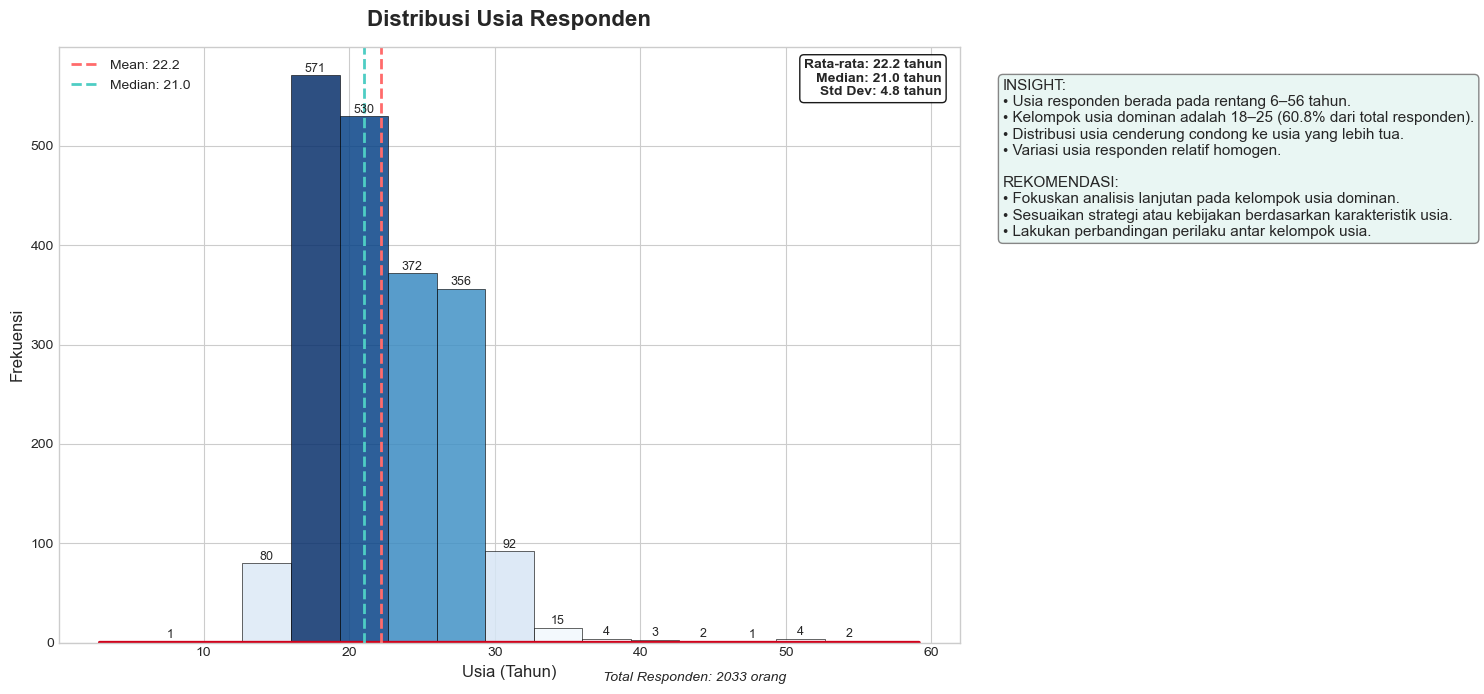

In [49]:
# Insight & Recommendation

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("Datacleaning.csv")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

mean_age = df['age'].mean()
median_age = df['age'].median()
std_age = df['age'].std()
min_age = df['age'].min()
max_age = df['age'].max()
total_responden = len(df)

n, bins, patches = ax.hist(
    df['age'],
    bins=15,
    alpha=0.85,
    edgecolor='black',
    linewidth=0.5
)

for patch in patches:
    patch.set_facecolor(plt.cm.Blues(patch.get_height() / max(n)))

sns.kdeplot(
    data=df,
    x='age',
    color='#D0021B',
    linewidth=2.5,
    ax=ax
)

ax.axvline(mean_age, color='#FF6B6B', linestyle='--', linewidth=2,
           label=f'Mean: {mean_age:.1f}')
ax.axvline(median_age, color='#4ECDC4', linestyle='--', linewidth=2,
           label=f'Median: {median_age:.1f}')

ax.set_title('Distribusi Usia Responden', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Usia (Tahun)', fontsize=12)
ax.set_ylabel('Frekuensi', fontsize=12)

for count, patch in zip(n, patches):
    if count > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            count + 0.5,
            f'{int(count)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

stats_text = (
    f'Rata-rata: {mean_age:.1f} tahun\n'
    f'Median: {median_age:.1f} tahun\n'
    f'Std Dev: {std_age:.1f} tahun'
)

ax.text(
    0.98, 0.98,
    stats_text,
    transform=ax.transAxes,
    fontsize=10,
    fontweight='semibold',
    va='top',
    ha='right',
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        alpha=0.9
    )
)

ax.legend(loc='upper left')

bins_age = [0, 17, 25, 35, 45, 60, 100]
labels_age = ['<18', '18–25', '26–35', '36–45', '46–60', '>60']
age_group = pd.cut(df['age'], bins=bins_age, labels=labels_age)

age_perc = (
    age_group
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
)

dominant_group = age_perc.idxmax()
dominant_value = age_perc.max()

insight_lines = [
    f"• Usia responden berada pada rentang {int(min_age)}–{int(max_age)} tahun.",
    f"• Kelompok usia dominan adalah {dominant_group} ({dominant_value:.1f}% dari total responden)."
]

if mean_age > median_age:
    insight_lines.append("• Distribusi usia cenderung condong ke usia yang lebih tua.")
elif mean_age < median_age:
    insight_lines.append("• Distribusi usia cenderung didominasi oleh responden usia muda.")
else:
    insight_lines.append("• Distribusi usia relatif simetris.")

if std_age > 8:
    insight_lines.append("• Variasi usia responden tergolong tinggi.")
else:
    insight_lines.append("• Variasi usia responden relatif homogen.")

final_insight_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Fokuskan analisis lanjutan pada kelompok usia dominan.\n"
    "• Sesuaikan strategi atau kebijakan berdasarkan karakteristik usia.\n"
    "• Lakukan perbandingan perilaku antar kelompok usia."
)

plt.gcf().text(
    0.72, 0.88,
    final_insight_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#E8F6F3',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.figtext(
    0.5, 0.02,
    f'Total Responden: {total_responden} orang',
    ha='center',
    fontsize=10,
    style='italic'
)

plt.tight_layout(rect=[0, 0, 0.7, 1])
plt.show()

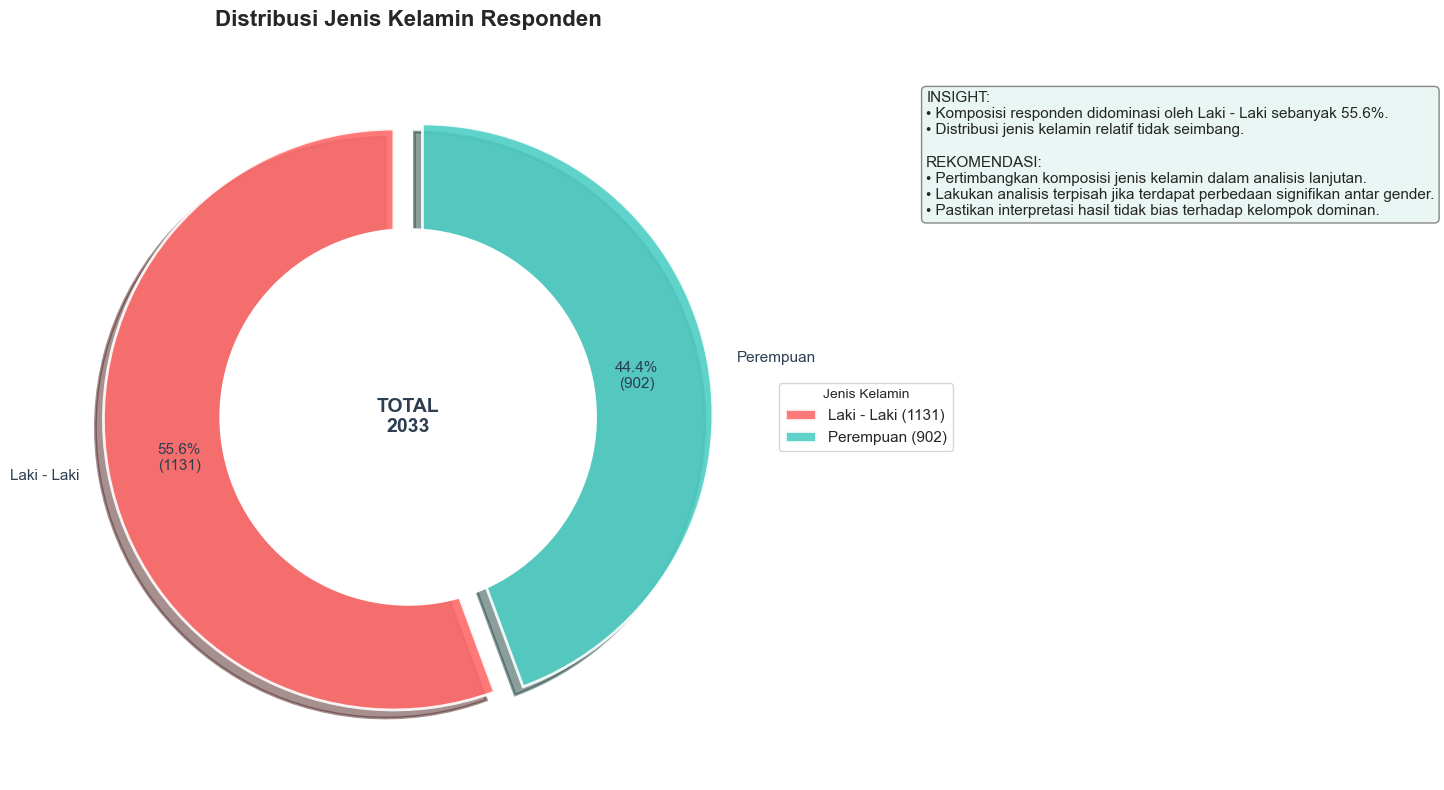

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

gender_counts = df['gender'].value_counts()
total_responden = gender_counts.sum()

labels = gender_counts.index.tolist()
values = gender_counts.values.tolist()

percentages = (gender_counts / total_responden * 100).round(1)

dominant_gender = percentages.idxmax()
dominant_percentage = percentages.max()

colors = ['#FF6B6B', '#4ECDC4', '#F7B731']

fig, ax = plt.subplots(figsize=(14, 8))

wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*total_responden)})',
    colors=colors[:len(values)],
    startangle=90,
    explode=[0.05]*len(values),
    shadow=True,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'alpha': 0.9},
    textprops={'fontsize': 11, 'fontweight': 'medium', 'color': '#2C3E50'},
    pctdistance=0.75
)

centre_circle = plt.Circle((0, 0), 0.65, fc='white')
ax.add_artist(centre_circle)

# Total di tengah
ax.annotate(
    f'TOTAL\n{total_responden}',
    xy=(0, 0),
    ha='center',
    va='center',
    fontsize=14,
    fontweight='bold',
    color='#2C3E50'
)

ax.set_title(
    'Distribusi Jenis Kelamin Responden',
    fontsize=16,
    fontweight='bold',
    pad=20
)

ax.legend(
    wedges,
    [f'{label} ({value})' for label, value in zip(labels, values)],
    title="Jenis Kelamin",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11,
    frameon=True
)

ax.set_aspect('equal')

insight_lines = []

insight_lines.append(
    f"• Komposisi responden didominasi oleh {dominant_gender} "
    f"sebanyak {dominant_percentage:.1f}%."
)

if dominant_percentage > 60:
    insight_lines.append(
        "• Distribusi jenis kelamin menunjukkan ketimpangan yang cukup signifikan."
    )
elif dominant_percentage > 50:
    insight_lines.append(
        "• Distribusi jenis kelamin relatif tidak seimbang."
    )
else:
    insight_lines.append(
        "• Distribusi jenis kelamin relatif seimbang."
    )

if len(labels) > 2:
    insight_lines.append(
        "• Terdapat lebih dari dua kategori jenis kelamin yang terwakili."
    )

final_insight_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Pertimbangkan komposisi jenis kelamin dalam analisis lanjutan.\n"
    "• Lakukan analisis terpisah jika terdapat perbedaan signifikan antar gender.\n"
    "• Pastikan interpretasi hasil tidak bias terhadap kelompok dominan."
)

plt.gcf().text(
    0.72, 0.88,                  
    final_insight_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#E8F6F3',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.tight_layout(rect=[0, 0, 0.7, 1])
plt.show()

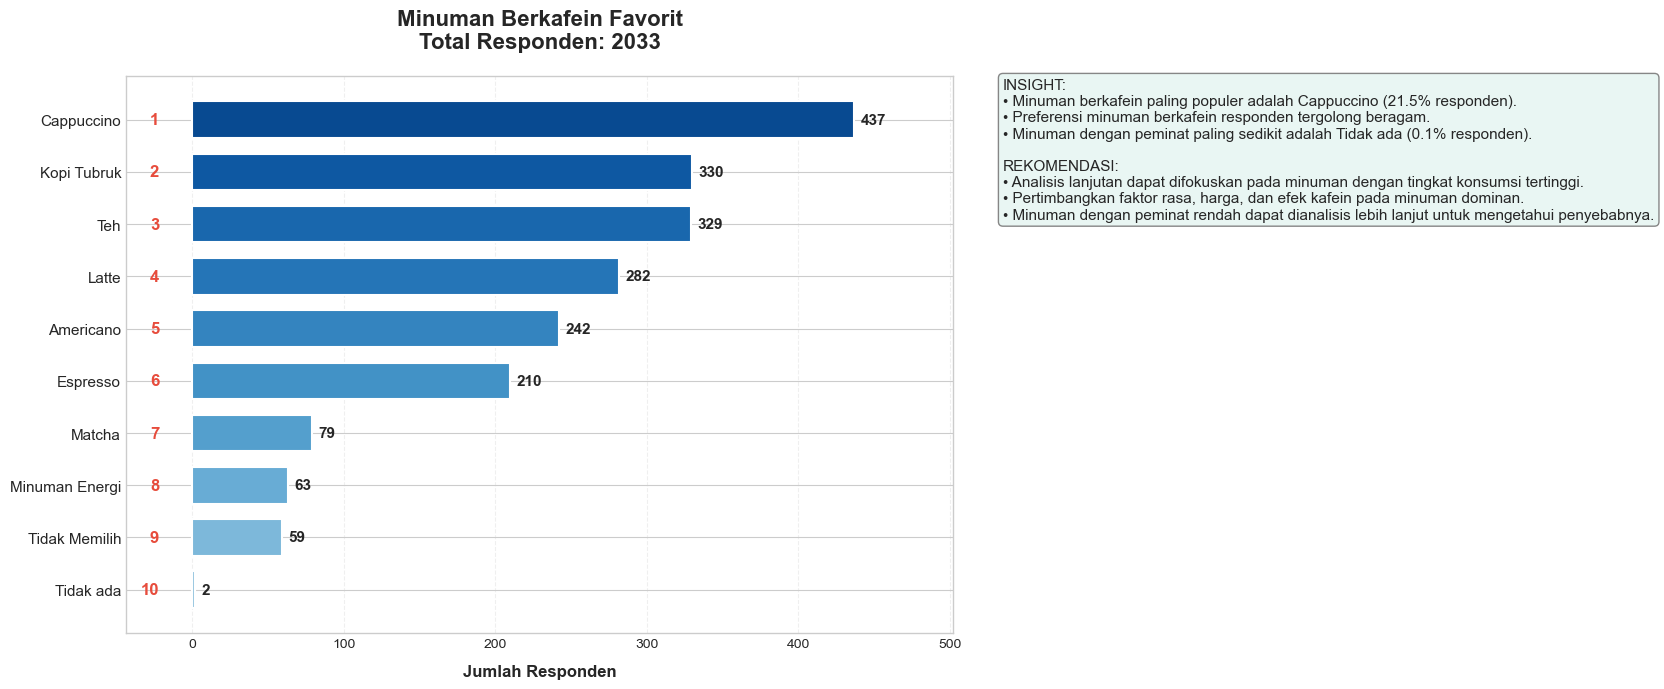

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')
drink_counts = (
    df['favorite_caffeine_drink']
    .value_counts()
    .sort_values(ascending=True)
)

total_responden = drink_counts.sum()

drink_perc = (drink_counts / total_responden * 100).round(1)

top_drink = drink_counts.idxmax()
top_value = drink_counts.max()
top_percentage = drink_perc[top_drink]

bottom_drink = drink_counts.idxmin()
bottom_percentage = drink_perc[bottom_drink]

colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(drink_counts)))

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.barh(
    drink_counts.index,
    drink_counts.values,
    color=colors,
    edgecolor='white',
    linewidth=1.5,
    height=0.7
)

for i, (drink, value) in enumerate(zip(drink_counts.index, drink_counts.values)):
    ax.text(
        -max(drink_counts.values)*0.05, i,
        f'{len(drink_counts)-i}',
        ha='right', va='center',
        fontsize=12, fontweight='bold',
        color='#E74C3C'
    )

    ax.text(
        value + max(drink_counts.values)*0.01, i,
        f'{int(value)}',
        ha='left', va='center',
        fontsize=11, fontweight='semibold'
    )

ax.set_title(
    f'Minuman Berkafein Favorit\nTotal Responden: {total_responden}',
    fontsize=16,
    fontweight='bold',
    pad=20
)

ax.set_xlabel('Jumlah Responden', fontsize=12, fontweight='semibold', labelpad=10)
ax.set_ylabel('')
ax.set_yticks(range(len(drink_counts)))
ax.set_yticklabels(drink_counts.index, fontsize=11)

ax.xaxis.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.set_xlim([-max(drink_counts.values)*0.1, max(drink_counts.values)*1.15])

insight_lines = []

insight_lines.append(
    f"• Minuman berkafein paling populer adalah {top_drink} "
    f"({top_percentage:.1f}% responden)."
)

if top_percentage > 50:
    insight_lines.append(
        "• Preferensi responden sangat terpusat pada satu jenis minuman."
    )
elif top_percentage > 30:
    insight_lines.append(
        "• Terdapat minuman yang dominan, namun preferensi masih cukup beragam."
    )
else:
    insight_lines.append(
        "• Preferensi minuman berkafein responden tergolong beragam."
    )

insight_lines.append(
    f"• Minuman dengan peminat paling sedikit adalah {bottom_drink} "
    f"({bottom_percentage:.1f}% responden)."
)

final_insight_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Analisis lanjutan dapat difokuskan pada minuman dengan tingkat konsumsi tertinggi.\n"
    "• Pertimbangkan faktor rasa, harga, dan efek kafein pada minuman dominan.\n"
    "• Minuman dengan peminat rendah dapat dianalisis lebih lanjut untuk mengetahui penyebabnya."
)

plt.gcf().text(
    0.72, 0.88,                 
    final_insight_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#E8F6F3',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.tight_layout(rect=[0, 0, 0.7, 1])
plt.show()

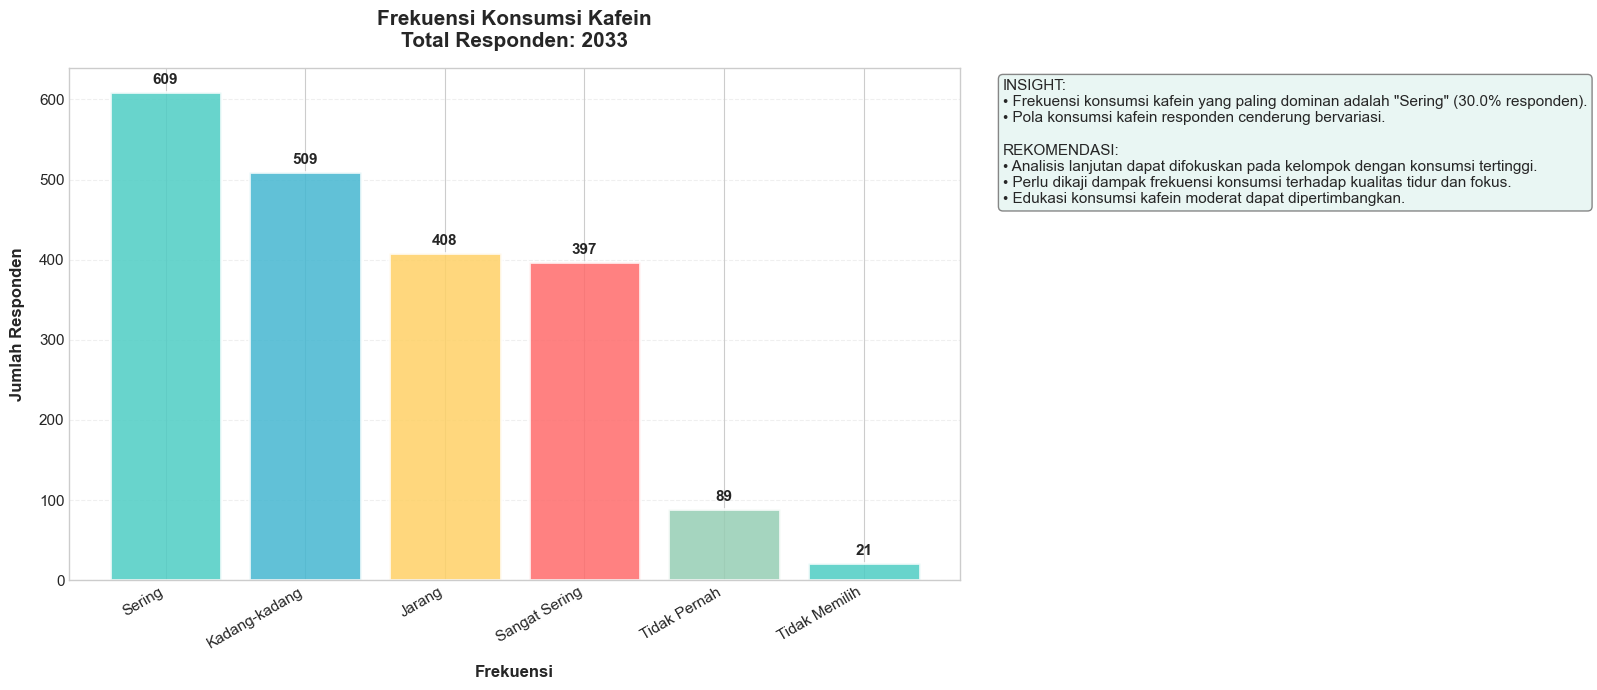

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')

freq_counts = df['caffeine_frequency'].value_counts()
total_responden = freq_counts.sum()

freq_perc = (freq_counts / total_responden * 100).round(1)

dominant_freq = freq_counts.idxmax()
dominant_percentage = freq_perc[dominant_freq]

colors = ['#4ECDC4', '#45B7D1', '#FFD166', '#FF6B6B', '#96CEB4']

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(
    freq_counts.index,
    freq_counts.values,
    color=colors[:len(freq_counts)],
    edgecolor='white',
    linewidth=2,
    alpha=0.85
)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + max(freq_counts.values)*0.01,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

ax.set_title(
    f'Frekuensi Konsumsi Kafein\nTotal Responden: {total_responden}',
    fontsize=15,
    fontweight='bold',
    pad=15
)
ax.set_xlabel('Frekuensi', fontsize=12, fontweight='semibold', labelpad=10)
ax.set_ylabel('Jumlah Responden', fontsize=12, fontweight='semibold', labelpad=10)

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)

ax.yaxis.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

insight_lines = []

insight_lines.append(
    f"• Frekuensi konsumsi kafein yang paling dominan adalah \"{dominant_freq}\" "
    f"({dominant_percentage:.1f}% responden)."
)

if dominant_percentage > 50:
    insight_lines.append(
        "• Mayoritas responden mengonsumsi kafein secara rutin."
    )
elif dominant_percentage > 30:
    insight_lines.append(
        "• Konsumsi kafein cukup sering ditemukan, namun tidak mendominasi secara absolut."
    )
else:
    insight_lines.append(
        "• Pola konsumsi kafein responden cenderung bervariasi."
    )

final_insight_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Analisis lanjutan dapat difokuskan pada kelompok dengan konsumsi tertinggi.\n"
    "• Perlu dikaji dampak frekuensi konsumsi terhadap kualitas tidur dan fokus.\n"
    "• Edukasi konsumsi kafein moderat dapat dipertimbangkan."
)

plt.gcf().text(
    0.72, 0.88,                 
    final_insight_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#E8F6F3',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.tight_layout(rect=[0, 0, 0.7, 1])
plt.show()

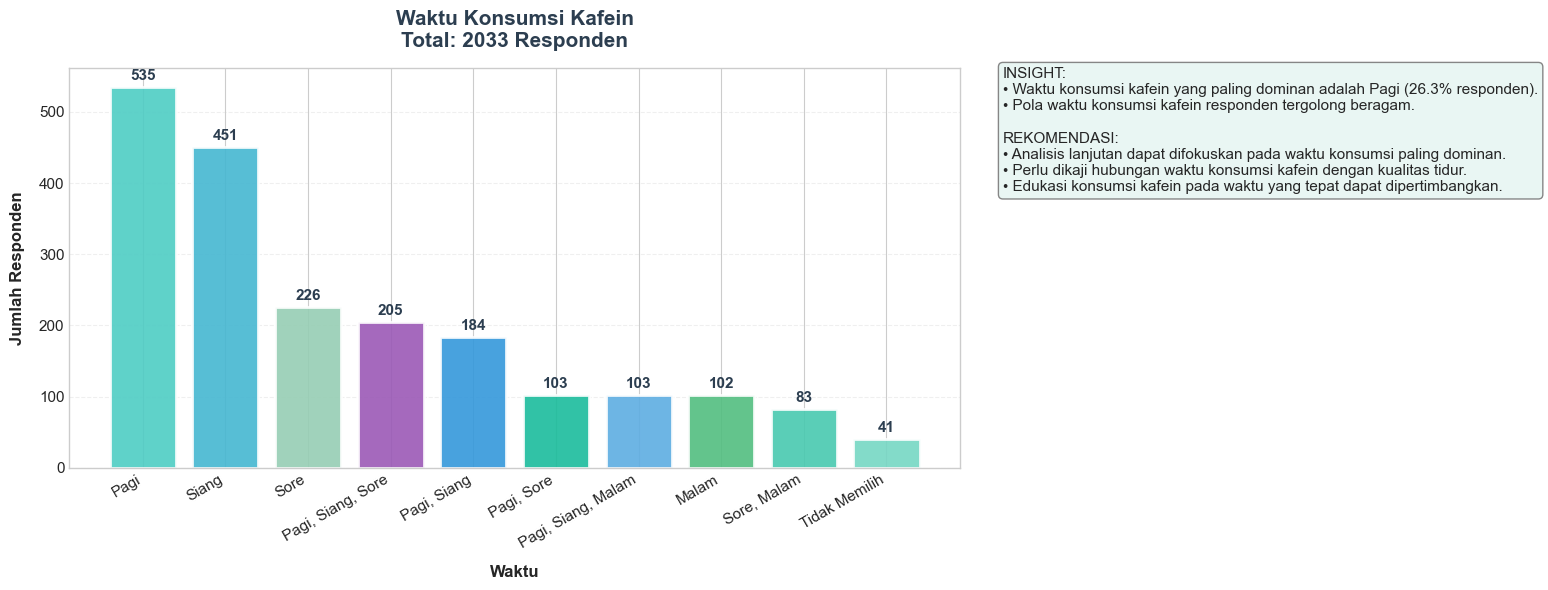

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')

time_counts = (
    df['caffeine_time']
    .value_counts()
    .sort_values(ascending=False)
)

total_responden = time_counts.sum()

time_perc = (time_counts / total_responden * 100).round(1)

dominant_time = time_counts.idxmax()
dominant_percentage = time_perc[dominant_time]

colors = [
    '#4ECDC4', '#45B7D1', '#96CEB4', '#9B59B6', '#3498DB',
    '#1ABC9C', '#5DADE2', '#52BE80', '#48C9B0', '#76D7C4'
][:len(time_counts)]

fig, ax = plt.subplots(figsize=(14, 6))

bars = ax.bar(
    time_counts.index,
    time_counts.values,
    color=colors,
    edgecolor='white',
    linewidth=2,
    alpha=0.9
)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + max(time_counts.values)*0.01,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='#2C3E50'
    )

ax.set_title(
    f'Waktu Konsumsi Kafein\nTotal: {total_responden} Responden',
    fontsize=15,
    fontweight='bold',
    pad=15,
    color='#2C3E50'
)

ax.set_xlabel('Waktu', fontsize=12, fontweight='semibold', labelpad=10)
ax.set_ylabel('Jumlah Responden', fontsize=12, fontweight='semibold', labelpad=10)

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)

ax.yaxis.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

insight_lines = []

insight_lines.append(
    f"• Waktu konsumsi kafein yang paling dominan adalah {dominant_time} "
    f"({dominant_percentage:.1f}% responden)."
)

if dominant_percentage > 50:
    insight_lines.append(
        "• Mayoritas responden mengonsumsi kafein pada waktu yang relatif sama."
    )
elif dominant_percentage > 30:
    insight_lines.append(
        "• Terdapat waktu konsumsi yang dominan, namun masih terdapat variasi waktu."
    )
else:
    insight_lines.append(
        "• Pola waktu konsumsi kafein responden tergolong beragam."
    )

final_insight_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Analisis lanjutan dapat difokuskan pada waktu konsumsi paling dominan.\n"
    "• Perlu dikaji hubungan waktu konsumsi kafein dengan kualitas tidur.\n"
    "• Edukasi konsumsi kafein pada waktu yang tepat dapat dipertimbangkan."
)

plt.gcf().text(
    0.72, 0.88,               
    final_insight_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#E8F6F3',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.tight_layout(rect=[0, 0, 0.7, 1])
plt.show()

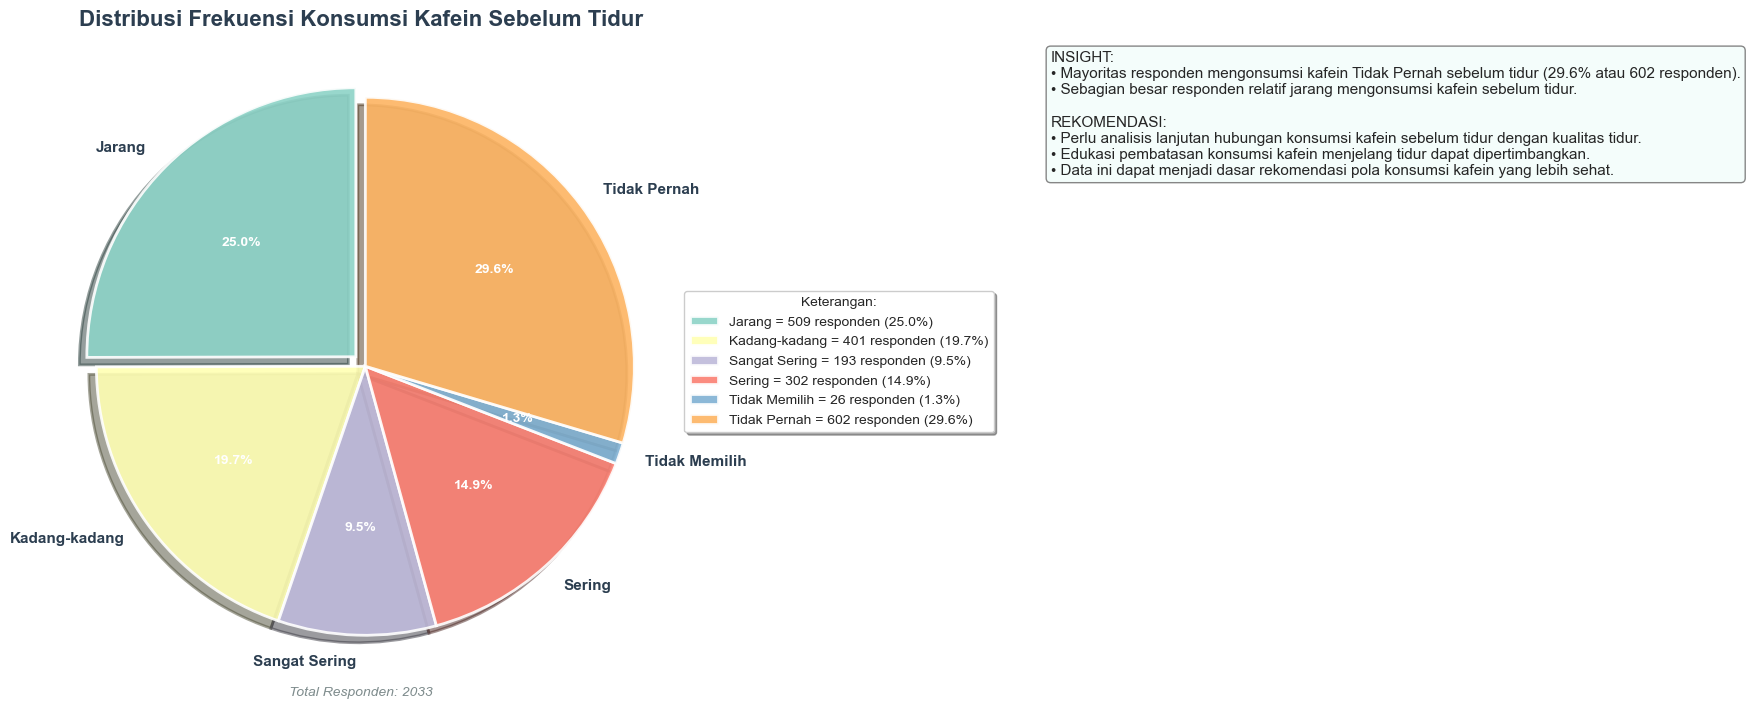

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

counts = df['caffeine_before_sleep'].value_counts().sort_index()
labels = [str(i) for i in counts.index]
total = counts.sum()

percentages = (counts / total * 100).round(1)

colors_map = {
    2: ['#FF6B6B','#4ECDC4'],
    3: ['#FF6B6B','#4ECDC4','#95E1D3']
}
explode_map = {
    2: (0.05,0),
    3: (0.05,0,0)
}

colors = colors_map.get(len(counts), plt.cm.Set3.colors)
explode = explode_map.get(len(counts), [0.05] + [0]*(len(counts)-1))
fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')

wedges, texts, autotexts = ax.pie(
    counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(counts)],
    explode=explode[:len(counts)],
    shadow=True,
    textprops={'fontsize':11,'fontweight':'bold','color':'#2c3e50'},
    wedgeprops={'edgecolor':'white','linewidth':2,'alpha':0.9}
)

for t in autotexts:
    t.set_color('white')
    t.set_fontweight('bold')
    t.set_fontsize(10)

legend_labels = [
    f'{label} = {value} responden ({percentages[label]:.1f}%)'
    for label, value in zip(labels, counts.values)
]

ax.legend(
    wedges,
    legend_labels,
    title="Keterangan:",
    loc="center left",
    bbox_to_anchor=(1,0,0.5,1),
    fontsize=10,
    frameon=True,
    fancybox=True,
    shadow=True
)

ax.set_title(
    "Distribusi Frekuensi Konsumsi Kafein Sebelum Tidur",
    fontsize=16,
    fontweight='bold',
    color='#2c3e50',
    pad=25
)

dominant_value = counts.idxmax()
dominant_count = counts.max()
dominant_percent = percentages[dominant_value]

insight_lines = [
    f"• Mayoritas responden mengonsumsi kafein {dominant_value} sebelum tidur "
    f"({dominant_percent:.1f}% atau {dominant_count} responden)."
]

if dominant_percent >= 50:
    insight_lines.append(
        "• Lebih dari setengah responden masih mengonsumsi kafein menjelang waktu tidur."
    )
elif dominant_percent >= 30:
    insight_lines.append(
        "• Konsumsi kafein sebelum tidur cukup signifikan pada sebagian responden."
    )
else:
    insight_lines.append(
        "• Sebagian besar responden relatif jarang mengonsumsi kafein sebelum tidur."
    )

final_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Perlu analisis lanjutan hubungan konsumsi kafein sebelum tidur dengan kualitas tidur.\n"
    "• Edukasi pembatasan konsumsi kafein menjelang tidur dapat dipertimbangkan.\n"
    "• Data ini dapat menjadi dasar rekomendasi pola konsumsi kafein yang lebih sehat."
)

plt.gcf().text(
    0.73, 0.88,
    final_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#F4FDFB',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.text(
    0.5, -0.05,
    f"Total Responden: {total}",
    ha='center',
    va='center',
    transform=ax.transAxes,
    fontsize=10,
    style='italic',
    color='#7f8c8d'
)

ax.axis('equal')
plt.tight_layout(rect=[0,0.05,0.7,0.95])
plt.show()

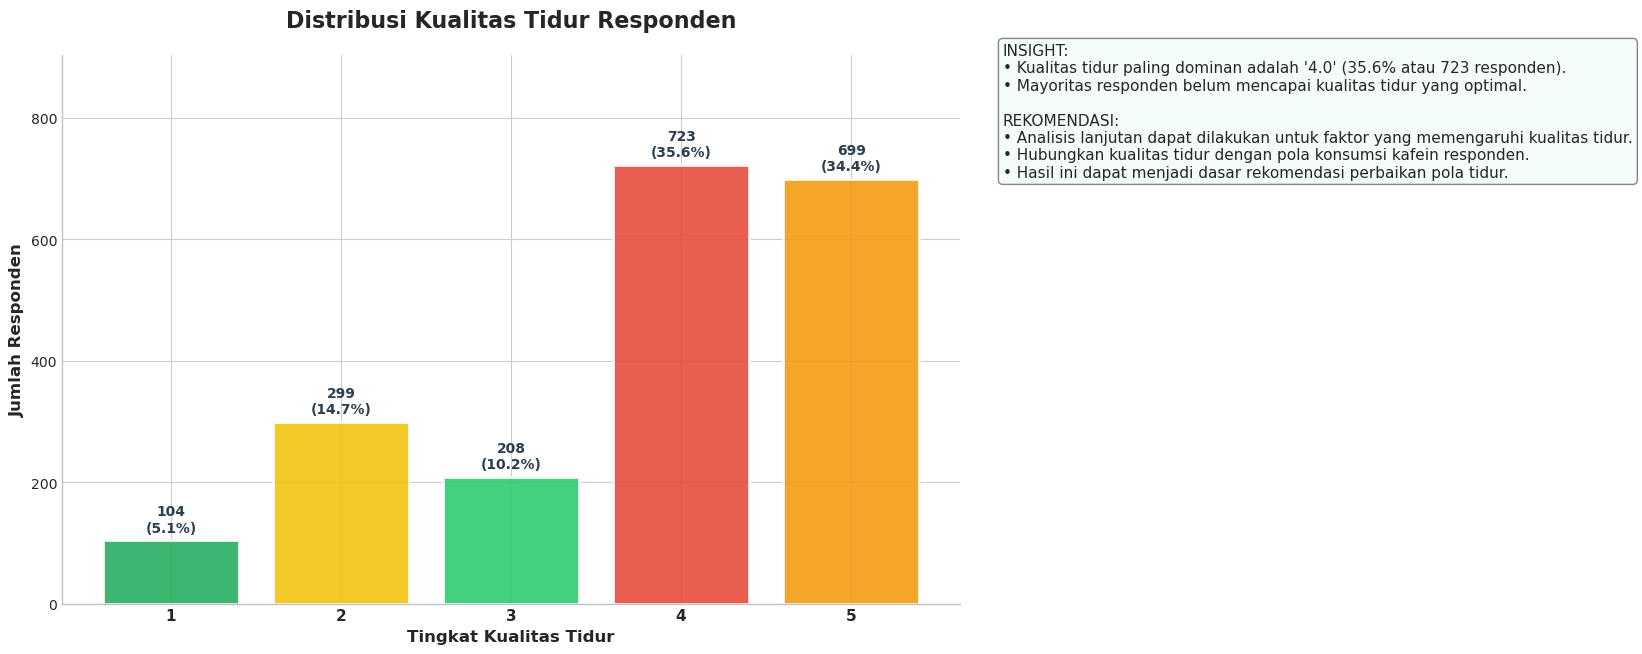

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'DejaVu Sans'

sleep_quality_counts = df['sleep_quality'].value_counts()
total = len(df)
quality_order = ['Sangat Buruk','Buruk','Cukup','Baik','Sangat Baik']
ordered_labels = [q for q in quality_order if q in sleep_quality_counts.index]
ordered_counts = [sleep_quality_counts[q] for q in ordered_labels]

# Fallback jika label berbeda
if len(ordered_counts) != len(sleep_quality_counts):
    ordered_labels = sleep_quality_counts.index.tolist()
    ordered_counts = sleep_quality_counts.values.tolist()

percentages = [(c/total)*100 for c in ordered_counts]

if len(ordered_counts) == 5:
    colors = ['#e74c3c','#f39c12','#f1c40f','#2ecc71','#27ae60']
elif len(ordered_counts) == 3:
    colors = ['#e74c3c','#f1c40f','#2ecc71']
else:
    colors = plt.cm.viridis(np.linspace(0.2,0.8,len(ordered_counts)))

fig, ax = plt.subplots(figsize=(14, 7), facecolor='white')

bars = ax.bar(
    ordered_labels,
    ordered_counts,
    color=colors,
    edgecolor='white',
    linewidth=2,
    alpha=0.9
)

for bar, pct in zip(bars, percentages):
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + max(ordered_counts)*0.02,
        f'{int(h)}\n({pct:.1f}%)',
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='#2c3e50'
    )

plt.xticks(fontsize=11, fontweight='semibold')
plt.xlabel("Tingkat Kualitas Tidur", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Responden", fontsize=12, fontweight='bold')
plt.ylim(0, max(ordered_counts)*1.25)

plt.title(
    "Distribusi Kualitas Tidur Responden",
    fontsize=16,
    fontweight='bold',
    pad=20
)

dominant_idx = np.argmax(ordered_counts)
dominant_label = ordered_labels[dominant_idx]
dominant_count = ordered_counts[dominant_idx]
dominant_pct = percentages[dominant_idx]

positive_sleep = sum(
    c for l, c in zip(ordered_labels, ordered_counts)
    if l in ['Baik','Sangat Baik']
)
positive_pct = (positive_sleep / total) * 100

insight_lines = [
    f"• Kualitas tidur paling dominan adalah '{dominant_label}' "
    f"({dominant_pct:.1f}% atau {dominant_count} responden)."
]

if positive_pct >= 50:
    insight_lines.append(
        f"• Sebanyak {positive_pct:.1f}% responden memiliki kualitas tidur yang baik hingga sangat baik."
    )
else:
    insight_lines.append(
        f"• Mayoritas responden belum mencapai kualitas tidur yang optimal."
    )

final_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Analisis lanjutan dapat dilakukan untuk faktor yang memengaruhi kualitas tidur.\n"
    "• Hubungkan kualitas tidur dengan pola konsumsi kafein responden.\n"
    "• Hasil ini dapat menjadi dasar rekomendasi perbaikan pola tidur."
)

plt.gcf().text(
    0.72, 0.88,
    final_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#F4FDFB',
        edgecolor='gray',
        alpha=0.95
    )
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#bdc3c7')
ax.spines['bottom'].set_color('#bdc3c7')

plt.tight_layout(rect=[0, 0, 0.7, 0.95])
plt.show()

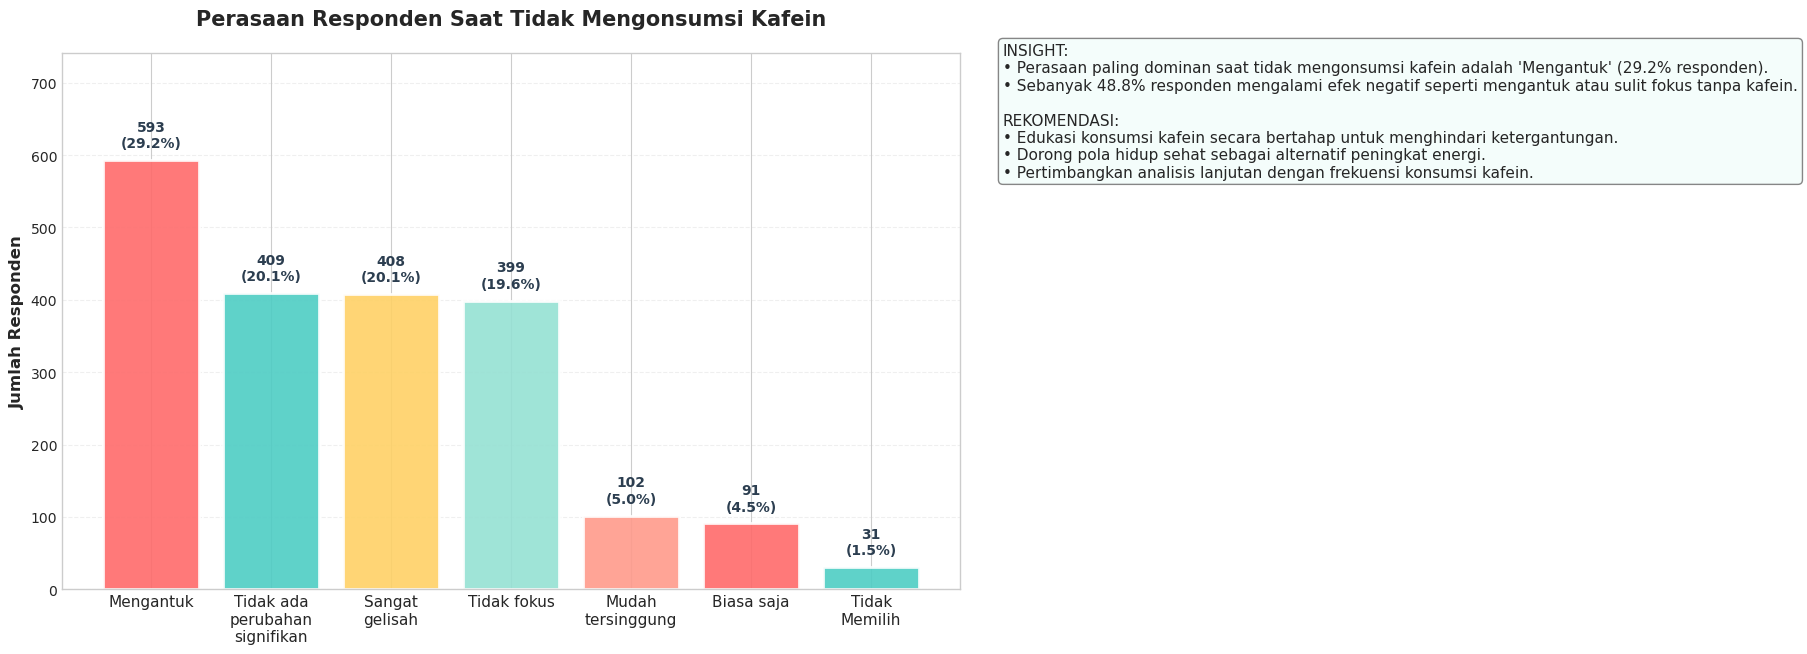

In [56]:
import matplotlib.pyplot as plt
import textwrap
import numpy as np

feeling_counts = df['feeling_without_caffeine'].value_counts()
total = len(df)

fig, ax = plt.subplots(figsize=(14, 7), facecolor='white')

colors = ['#FF6B6B','#4ECDC4','#FFD166','#95E1D3','#FF9A8B'][:len(feeling_counts)]
bars = ax.bar(
    feeling_counts.index,
    feeling_counts.values,
    color=colors,
    edgecolor='white',
    linewidth=2,
    alpha=0.9
)

for bar, count in zip(bars, feeling_counts.values):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        count + max(feeling_counts.values)*0.03,
        f'{int(count)}\n({count/total*100:.1f}%)',
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='#2c3e50'
    )

wrapped_labels = ['\n'.join(textwrap.wrap(label, 12)) for label in feeling_counts.index]
ax.set_xticks(range(len(wrapped_labels)))
ax.set_xticklabels(wrapped_labels, fontsize=11)

ax.set_title(
    'Perasaan Responden Saat Tidak Mengonsumsi Kafein',
    fontsize=15,
    fontweight='bold',
    pad=20
)
ax.set_ylabel('Jumlah Responden', fontsize=12, fontweight='bold')
ax.set_ylim(0, max(feeling_counts.values)*1.25)

ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

dominant_feeling = feeling_counts.idxmax()
dominant_value = feeling_counts.max()
dominant_pct = (dominant_value / total) * 100

negative_keywords = ['mengantuk','lemas','tidak fokus','sakit kepala','lesu']
negative_total = sum(
    v for k, v in feeling_counts.items()
    if any(word.lower() in k.lower() for word in negative_keywords)
)
negative_pct = (negative_total / total) * 100 if negative_total > 0 else 0

insight_lines = [
    f"• Perasaan paling dominan saat tidak mengonsumsi kafein adalah "
    f"'{dominant_feeling}' ({dominant_pct:.1f}% responden)."
]

if negative_pct > 40:
    insight_lines.append(
        f"• Sebanyak {negative_pct:.1f}% responden mengalami efek negatif "
        f"seperti mengantuk atau sulit fokus tanpa kafein."
    )
else:
    insight_lines.append(
        "• Tidak semua responden mengalami ketergantungan signifikan terhadap kafein."
    )

final_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Edukasi konsumsi kafein secara bertahap untuk menghindari ketergantungan.\n"
    "• Dorong pola hidup sehat sebagai alternatif peningkat energi.\n"
    "• Pertimbangkan analisis lanjutan dengan frekuensi konsumsi kafein."
)

plt.gcf().text(
    0.72, 0.88,
    final_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#F4FDFB',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.tight_layout(rect=[0, 0, 0.7, 0.95])
plt.show()

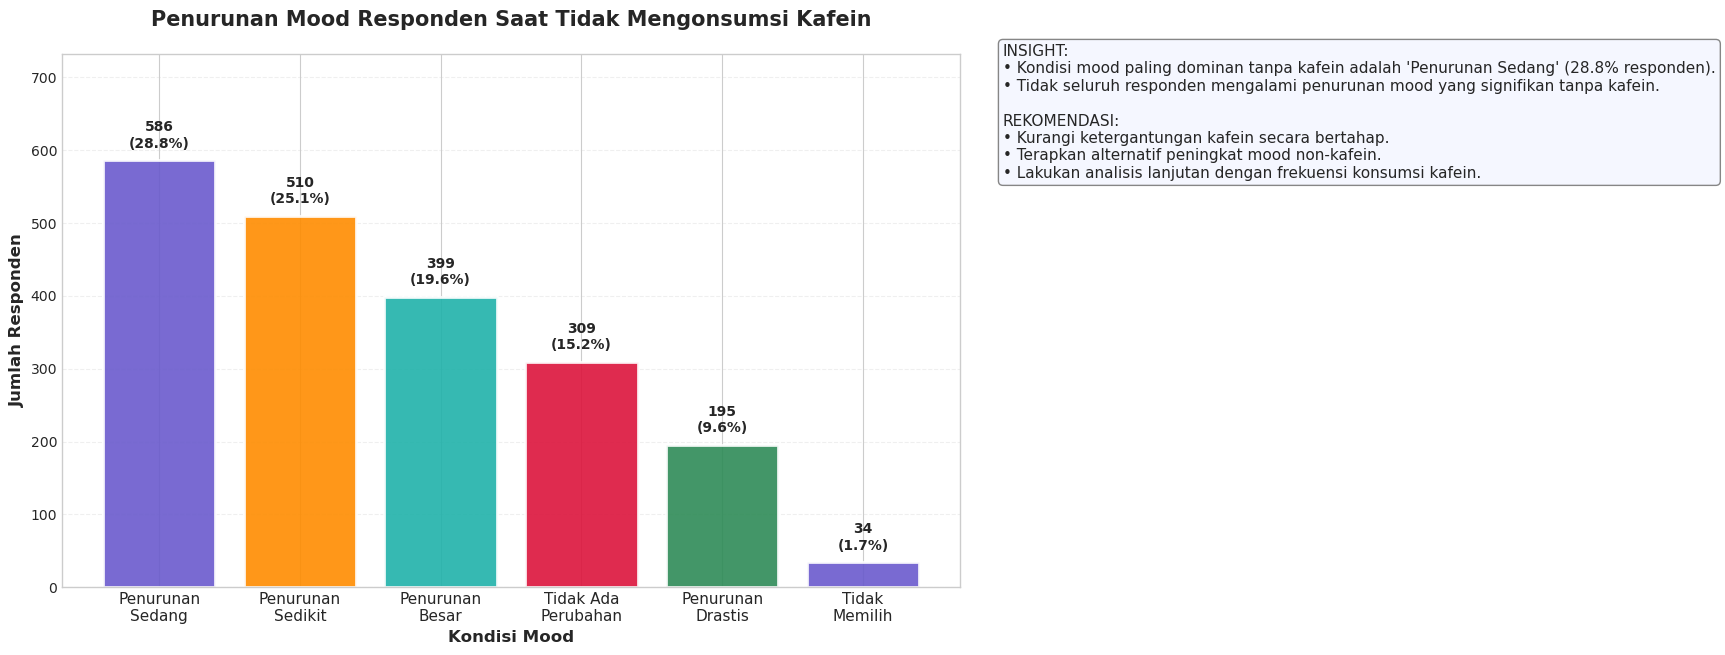

In [57]:
import textwrap
import matplotlib.pyplot as plt
import numpy as np

mood_counts = df['mood_drop_without_caffeine'].value_counts()
total = len(df)

fig, ax = plt.subplots(figsize=(14, 7), facecolor='white')

colors = ['#6A5ACD', '#FF8C00', '#20B2AA', '#DC143C', '#2E8B57'][:len(mood_counts)]

bars = ax.bar(
    mood_counts.index,
    mood_counts.values,
    color=colors,
    edgecolor='white',
    linewidth=2,
    alpha=0.9
)

for bar, count in zip(bars, mood_counts.values):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        count + max(mood_counts.values)*0.03,
        f'{int(count)}\n({count/total*100:.1f}%)',
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

wrapped_labels = ['\n'.join(textwrap.wrap(label, 12)) for label in mood_counts.index]
ax.set_xticks(range(len(wrapped_labels)))
ax.set_xticklabels(wrapped_labels, fontsize=11)

ax.set_title(
    "Penurunan Mood Responden Saat Tidak Mengonsumsi Kafein",
    fontsize=15,
    fontweight='bold',
    pad=20
)
ax.set_xlabel("Kondisi Mood", fontsize=12, fontweight='bold')
ax.set_ylabel("Jumlah Responden", fontsize=12, fontweight='bold')

ax.set_ylim(0, max(mood_counts.values)*1.25)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

dominant_mood = mood_counts.idxmax()
dominant_value = mood_counts.max()
dominant_pct = (dominant_value / total) * 100

negative_keywords = ['buruk', 'emosi', 'marah', 'sedih', 'bad mood', 'tidak stabil']
negative_total = sum(
    v for k, v in mood_counts.items()
    if any(word.lower() in k.lower() for word in negative_keywords)
)
negative_pct = (negative_total / total) * 100 if negative_total > 0 else 0

insight_lines = [
    f"• Kondisi mood paling dominan tanpa kafein adalah "
    f"'{dominant_mood}' ({dominant_pct:.1f}% responden)."
]

if negative_pct > 40:
    insight_lines.append(
        f"• Sebanyak {negative_pct:.1f}% responden mengalami penurunan mood "
        f"yang bersifat KURANG POSITIF tanpa kafein."
    )
else:
    insight_lines.append(
        "• Tidak seluruh responden mengalami penurunan mood yang signifikan tanpa kafein."
    )

final_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Kurangi ketergantungan kafein secara bertahap.\n"
    "• Terapkan alternatif peningkat mood non-kafein.\n"
    "• Lakukan analisis lanjutan dengan frekuensi konsumsi kafein."
)

plt.gcf().text(
    0.72, 0.88,
    final_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#F5F7FF',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.tight_layout(rect=[0, 0, 0.7, 0.95])
plt.show()

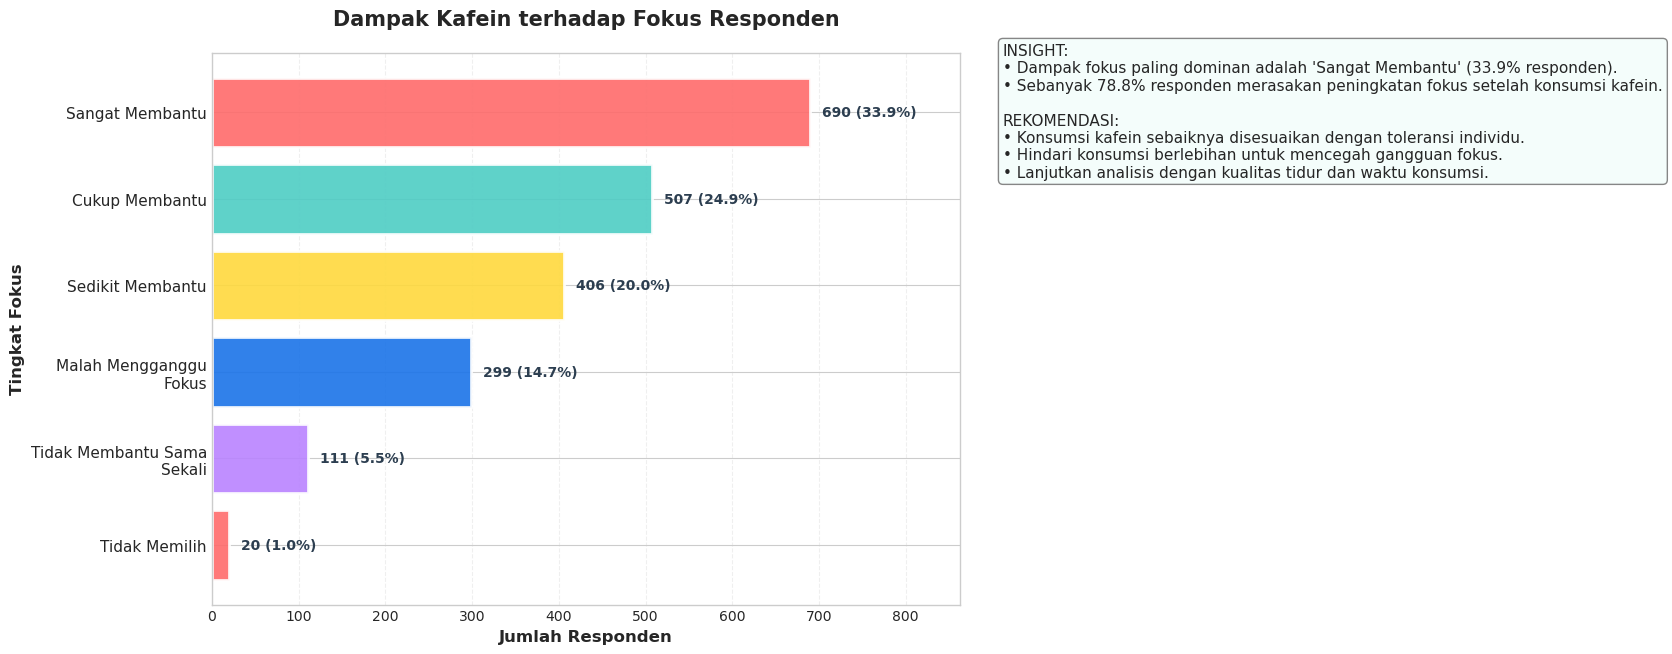

In [58]:
import textwrap
import matplotlib.pyplot as plt
import numpy as np

focus_counts = (
    df['focus_boost_caffeine']
    .value_counts()
    .sort_values(ascending=False)
)

total = len(df)

fig, ax = plt.subplots(figsize=(14, 7), facecolor='white')

colors_focus = ['#FF6B6B', '#4ECDC4', '#FFD93D', '#1A73E8', '#B983FF'][:len(focus_counts)]

bars = ax.barh(
    focus_counts.index,
    focus_counts.values,
    color=colors_focus,
    edgecolor='white',
    linewidth=2,
    alpha=0.9
)

for i, value in enumerate(focus_counts.values):
    ax.text(
        value + max(focus_counts.values)*0.02,
        i,
        f'{int(value)} ({value/total*100:.1f}%)',
        va='center',
        fontsize=10,
        fontweight='bold',
        color='#2c3e50'
    )

wrapped_labels = ['\n'.join(textwrap.wrap(label, 20)) for label in focus_counts.index]
ax.set_yticks(range(len(wrapped_labels)))
ax.set_yticklabels(wrapped_labels, fontsize=11)
ax.set_title(
    "Dampak Kafein terhadap Fokus Responden",
    fontsize=15,
    fontweight='bold',
    pad=20
)
ax.set_xlabel("Jumlah Responden", fontsize=12, fontweight='bold')
ax.set_ylabel("Tingkat Fokus", fontsize=12, fontweight='bold')

ax.set_xlim(0, max(focus_counts.values)*1.25)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

ax.invert_yaxis()

positive_labels = ['Sangat Membantu', 'Cukup Membantu', 'Sedikit Membantu']
negative_labels = ['Malah Mengganggu Fokus', 'Tidak Membantu Sama Sekali']

positive_total = sum(
    v for k, v in focus_counts.items()
    if k in positive_labels
)
negative_total = sum(
    v for k, v in focus_counts.items()
    if k in negative_labels
)

positive_pct = (positive_total / total) * 100
negative_pct = (negative_total / total) * 100

dominant_focus = focus_counts.idxmax()
dominant_pct = (focus_counts.max() / total) * 100

insight_lines = [
    f"• Dampak fokus paling dominan adalah '{dominant_focus}' "
    f"({dominant_pct:.1f}% responden)."
]

if positive_pct > negative_pct:
    insight_lines.append(
        f"• Sebanyak {positive_pct:.1f}% responden merasakan "
        f"peningkatan fokus setelah konsumsi kafein."
    )
else:
    insight_lines.append(
        f"• Sebanyak {negative_pct:.1f}% responden tidak merasakan "
        f"manfaat fokus atau justru terganggu."
    )

final_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Konsumsi kafein sebaiknya disesuaikan dengan toleransi individu.\n"
    "• Hindari konsumsi berlebihan untuk mencegah gangguan fokus.\n"
    "• Lanjutkan analisis dengan kualitas tidur dan waktu konsumsi."
)

plt.gcf().text(
    0.72, 0.88,
    final_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#F4FDFB',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.tight_layout(rect=[0, 0, 0.7, 0.95])
plt.show()

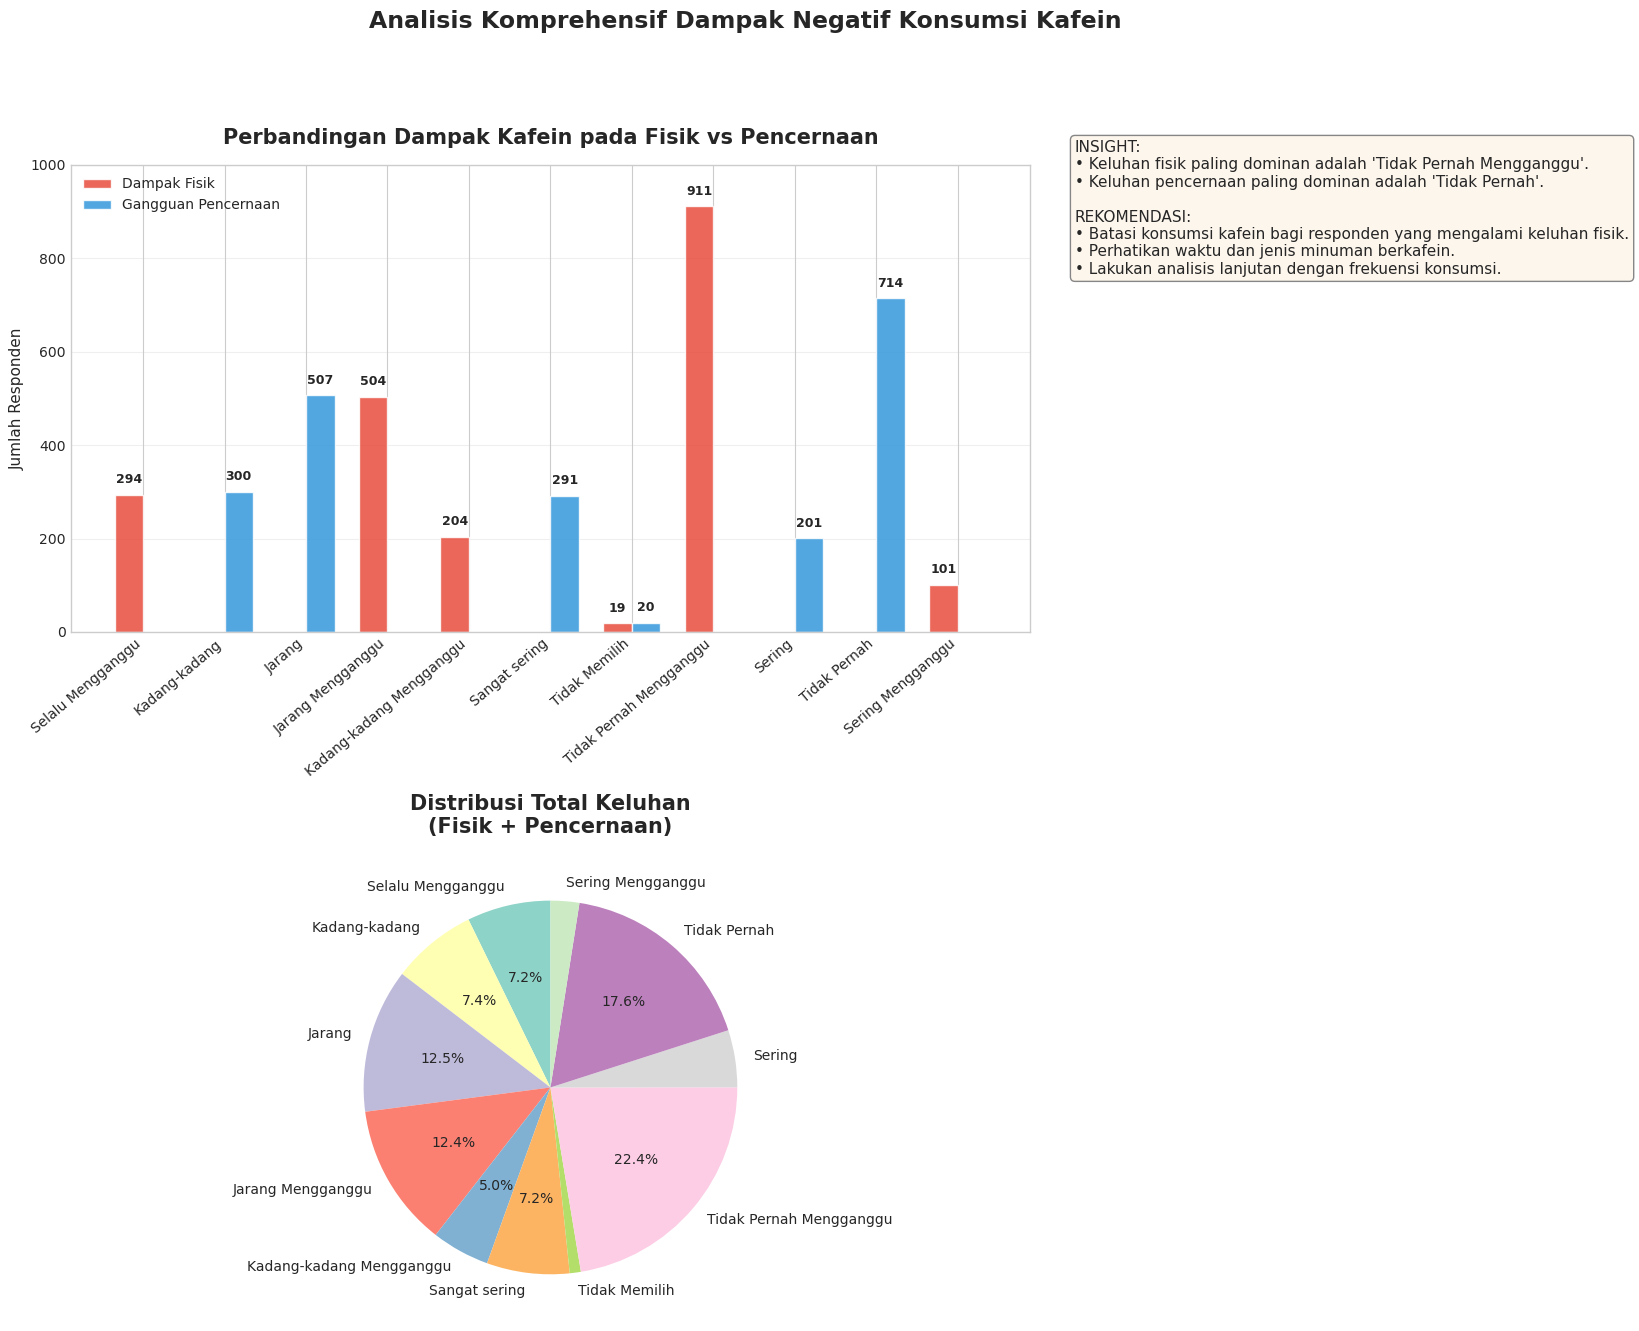

In [59]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 13), facecolor='white')

physical_counts = df['physical_side_effects_impact'].value_counts()
digestion_counts = df['digestion_issues_from_caffeine'].value_counts()
total = len(df)

common_labels = list(set(physical_counts.index) | set(digestion_counts.index))
physical_counts = physical_counts.reindex(common_labels, fill_value=0)
digestion_counts = digestion_counts.reindex(common_labels, fill_value=0)

x = np.arange(len(common_labels))
width = 0.35
bars1 = ax1.bar(
    x - width/2,
    physical_counts.values,
    width,
    label='Dampak Fisik',
    color='#e74c3c',
    edgecolor='white',
    alpha=0.85
)

bars2 = ax1.bar(
    x + width/2,
    digestion_counts.values,
    width,
    label='Gangguan Pencernaan',
    color='#3498db',
    edgecolor='white',
    alpha=0.85
)

def add_bar_annotations(bars, ax):
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                h + max(
                    max(physical_counts.values),
                    max(digestion_counts.values)
                ) * 0.02,
                f'{int(h)}',
                ha='center',
                va='bottom',
                fontsize=9,
                fontweight='bold'
            )

add_bar_annotations(bars1, ax1)
add_bar_annotations(bars2, ax1)

ax1.set_xticks(x)
ax1.set_xticklabels(common_labels, rotation=40, ha='right', fontsize=10)
ax1.set_ylabel('Jumlah Responden', fontsize=11)
ax1.set_title(
    'Perbandingan Dampak Kafein pada Fisik vs Pencernaan',
    fontsize=15,
    fontweight='bold',
    pad=15
)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(axis='y', alpha=0.3)
ax1.set_axisbelow(True)
ax1.set_ylim(0, 1000)

total_effects = physical_counts + digestion_counts

colors = plt.cm.Set3(range(len(common_labels)))
ax2.pie(
    total_effects.values,
    labels=common_labels,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 10}
)

ax2.set_title(
    'Distribusi Total Keluhan\n(Fisik + Pencernaan)',
    fontsize=15,
    fontweight='bold',
    pad=15
)

dominant_physical = physical_counts.idxmax()
dominant_digestion = digestion_counts.idxmax()

physical_pct = physical_counts.sum() / total * 100
digestion_pct = digestion_counts.sum() / total * 100

insight_lines = [
    f"• Keluhan fisik paling dominan adalah '{dominant_physical}'.",
    f"• Keluhan pencernaan paling dominan adalah '{dominant_digestion}'."
]

if physical_pct > digestion_pct:
    insight_lines.append(
        f"• Dampak fisik ({physical_pct:.1f}%) lebih sering dialami "
        f"dibanding gangguan pencernaan."
    )

final_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Batasi konsumsi kafein bagi responden yang mengalami keluhan fisik.\n"
    "• Perhatikan waktu dan jenis minuman berkafein.\n"
    "• Lakukan analisis lanjutan dengan frekuensi konsumsi."
)

plt.gcf().text(
    0.72, 0.92,
    final_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#FDF6EC',
        edgecolor='gray',
        alpha=0.95
    )
)

plt.suptitle(
    'Analisis Komprehensif Dampak Negatif Konsumsi Kafein',
    fontsize=17,
    fontweight='bold',
    y=1.02
)

plt.tight_layout(rect=[0, 0, 0.7, 0.97])
plt.show()

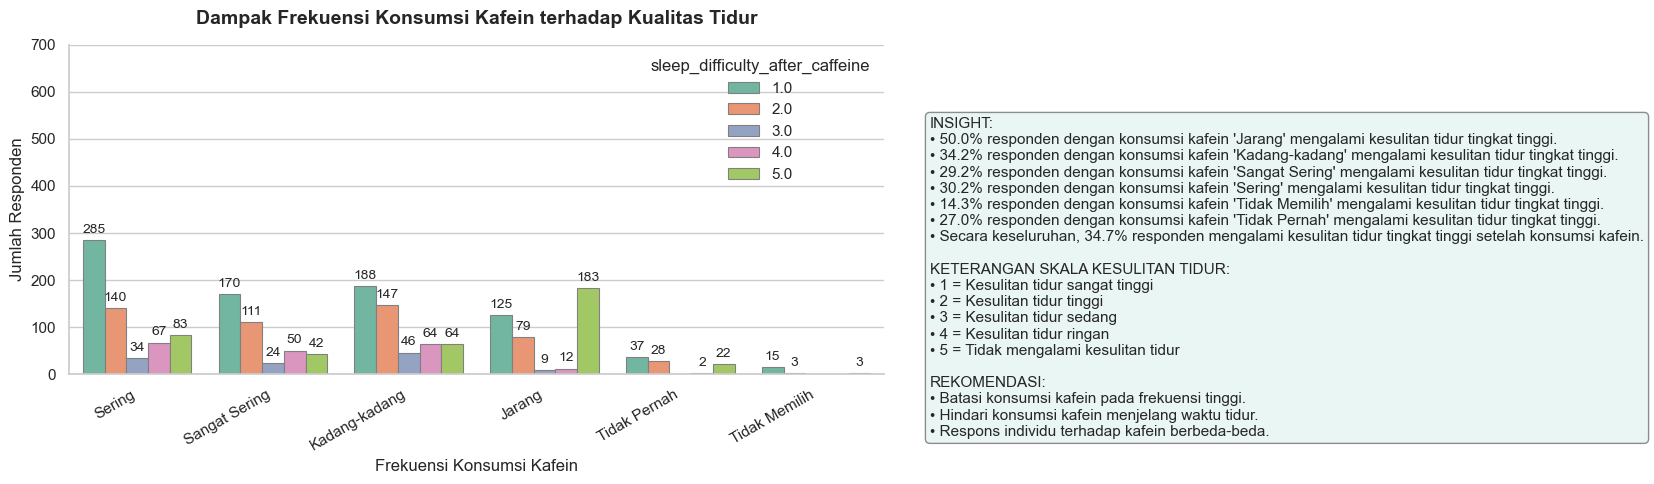

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14,5))

ax = sns.countplot(
    data=df,
    x='caffeine_frequency',
    hue='sleep_difficulty_after_caffeine',
    palette='Set2',
    edgecolor='gray',
    linewidth=0.8
)

plt.title(
    "Dampak Frekuensi Konsumsi Kafein terhadap Kualitas Tidur",
    fontsize=14,
    fontweight='bold',
    pad=15
)
plt.xlabel("Frekuensi Konsumsi Kafein", fontsize=12)
plt.ylabel("Jumlah Responden")
plt.ylim(0, 700)
plt.xticks(rotation=30, ha='right')

for container in ax.containers:
    ax.bar_label(container, fontsize=10, padding=3)

sns.despine()

df['sleep_difficulty_after_caffeine'] = pd.to_numeric(
    df['sleep_difficulty_after_caffeine'],
    errors='coerce'
)

difficulty_threshold = df['sleep_difficulty_after_caffeine'].quantile(0.7)

sleep_dist = (
    df
    .assign(high_difficulty =
        df['sleep_difficulty_after_caffeine'] >= difficulty_threshold
    )
    .groupby('caffeine_frequency')['high_difficulty']
    .mean()
    .mul(100)
    .round(1)
)

insight_lines = []

for freq, pct in sleep_dist.items():
    insight_lines.append(
        f"• {pct:.1f}% responden dengan konsumsi kafein '{freq}' "
        f"mengalami kesulitan tidur tingkat tinggi."
    )

overall_high = (
    (df['sleep_difficulty_after_caffeine'] >= difficulty_threshold)
    .mean() * 100
)

insight_lines.append(
    f"• Secara keseluruhan, {overall_high:.1f}% responden "
    f"mengalami kesulitan tidur tingkat tinggi setelah konsumsi kafein."
)

final_insight_text = (
    "INSIGHT:\n"
    + "\n".join(insight_lines)
    + "\n\nKETERANGAN SKALA KESULITAN TIDUR:\n"
    "• 1 = Kesulitan tidur sangat tinggi\n"
    "• 2 = Kesulitan tidur tinggi\n"
    "• 3 = Kesulitan tidur sedang\n"
    "• 4 = Kesulitan tidur ringan\n"
    "• 5 = Tidak mengalami kesulitan tidur\n\n"
    "REKOMENDASI:\n"
    "• Batasi konsumsi kafein pada frekuensi tinggi.\n"
    "• Hindari konsumsi kafein menjelang waktu tidur.\n"
    "• Respons individu terhadap kafein berbeda-beda."
)

plt.gcf().text(
    0.67, 0.75,
    final_insight_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#E8F6F3',
        edgecolor='gray',
        alpha=0.9
    )
)

plt.tight_layout(rect=[0, 0, 0.65, 1])
plt.show()

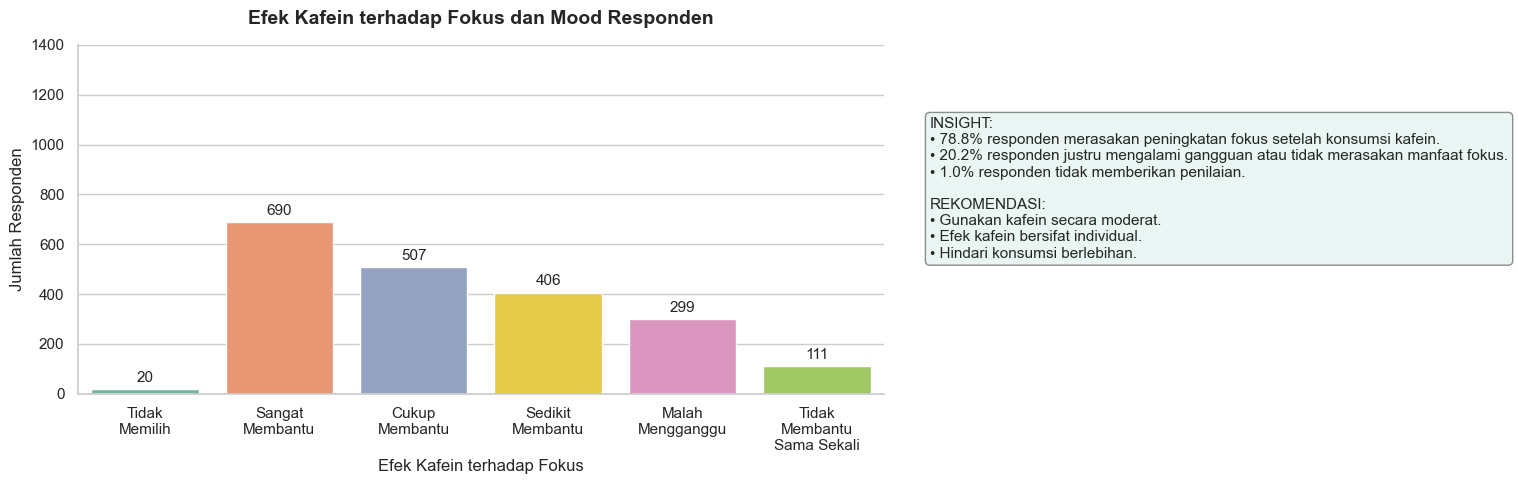

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid")

focus_order = [
    "Tidak Memilih",
    "Sangat Membantu",
    "Cukup Membantu", 
    "Sedikit Membantu",
    "Malah Mengganggu Fokus",
    "Tidak Membantu Sama Sekali"
]

# Label multiline (mapping aman)
focus_labels = [
    "Tidak\nMemilih",
    "Sangat\nMembantu",
    "Cukup\nMembantu",
    "Sedikit\nMembantu",
    "Malah\nMengganggu",
    "Tidak\nMembantu\nSama Sekali"
]

plt.figure(figsize=(14,5))

ax = sns.countplot(
    data=df,
    x='focus_boost_caffeine',
    order=focus_order,
    hue='focus_boost_caffeine',  
    palette='Set2',
    legend=False               
)

plt.title(
    "Efek Kafein terhadap Fokus dan Mood Responden",
    fontsize=14,
    fontweight='bold',
    pad=15
)
plt.xlabel("Efek Kafein terhadap Fokus", fontsize=12)
plt.ylabel("Jumlah Responden")
plt.ylim(0, 1400)

ax.set_xticks(range(len(focus_labels)))
ax.set_xticklabels(focus_labels)

for container in ax.containers:
    ax.bar_label(container, fontsize=11, padding=3)

sns.despine()
focus_counts_perc = (
    df['focus_boost_caffeine']
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
)

insight_lines = []

positive_boost = ['Sangat Membantu', 'Cukup Membantu', 'Sedikit Membantu']
total_positive = sum(focus_counts_perc.get(cat, 0) for cat in positive_boost)

if total_positive > 0:
    insight_lines.append(
        f"• {total_positive:.1f}% responden merasakan peningkatan fokus setelah konsumsi kafein."
    )

negative_boost = ['Malah Mengganggu Fokus', 'Tidak Membantu Sama Sekali']
total_negative = sum(focus_counts_perc.get(cat, 0) for cat in negative_boost)

if total_negative > 0:
    insight_lines.append(
        f"• {total_negative:.1f}% responden justru mengalami gangguan atau tidak merasakan manfaat fokus."
    )

no_opinion = focus_counts_perc.get('Tidak Memilih', 0)
if no_opinion > 0:
    insight_lines.append(
        f"• {no_opinion:.1f}% responden tidak memberikan penilaian."
    )

final_insight_text = (
    "INSIGHT:\n" + "\n".join(insight_lines) + "\n\n"
    "REKOMENDASI:\n"
    "• Gunakan kafein secara moderat.\n"
    "• Efek kafein bersifat individual.\n"
    "• Hindari konsumsi berlebihan."
)

plt.gcf().text(
    0.67, 0.75,
    final_insight_text,
    ha='left',
    va='top',
    fontsize=11,
    bbox=dict(
        boxstyle='round',
        facecolor='#E8F6F3',
        edgecolor='gray',
        alpha=0.9
    )
)

plt.tight_layout(rect=[0, 0, 0.65, 1])
plt.show()

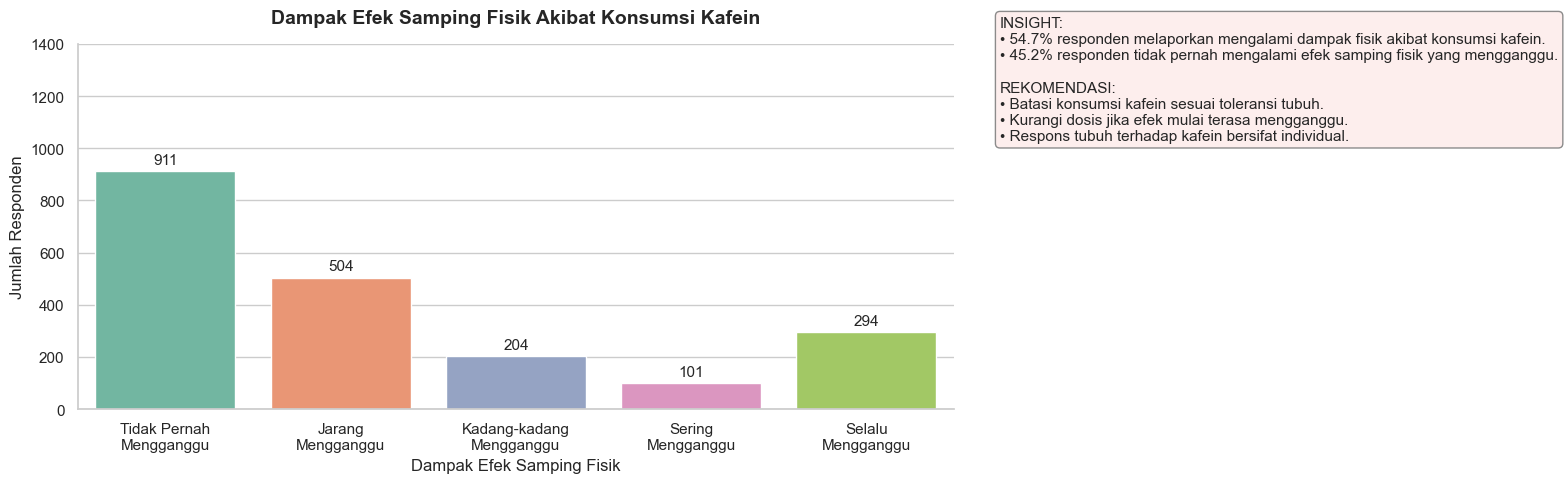

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ganti path sesuai file kamu
df = pd.read_csv("Datacleaning.csv")

df['physical_side_effects_impact'] = (
    df['physical_side_effects_impact']
    .astype(str)
    .str.strip()
    .str.title()
)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,5))

impact_order = [
    "Tidak Pernah Mengganggu",
    "Jarang Mengganggu",
    "Kadang-Kadang Mengganggu",
    "Sering Mengganggu",
    "Selalu Mengganggu"
]

impact_labels = [
    "Tidak Pernah\nMengganggu",
    "Jarang\nMengganggu",
    "Kadang-kadang\nMengganggu",
    "Sering\nMengganggu",
    "Selalu\nMengganggu"
]

df['physical_side_effects_impact'] = pd.Categorical(
    df['physical_side_effects_impact'],
    categories=impact_order,
    ordered=True
)

ax = sns.countplot(
    data=df,
    x='physical_side_effects_impact',
    order=impact_order,
    hue='physical_side_effects_impact',
    palette='Set2',
    legend=False
)

plt.title(
    "Dampak Efek Samping Fisik Akibat Konsumsi Kafein",
    fontsize=14,
    fontweight='bold',
    pad=15
)
plt.xlabel("Dampak Efek Samping Fisik", fontsize=12)
plt.ylabel("Jumlah Responden")
plt.ylim(0, 1400)

ax.set_xticks(range(len(impact_labels)))
ax.set_xticklabels(impact_labels)

for container in ax.containers:
    ax.bar_label(container, fontsize=11, padding=3)

sns.despine()

physical_impact_counts_perc = (
    df['physical_side_effects_impact']
    .value_counts(normalize=True, sort=False)
    .mul(100)
    .round(1)
)

impact_categories = [
    'Jarang Mengganggu',
    'Kadang-Kadang Mengganggu',
    'Sering Mengganggu',
    'Selalu Mengganggu'
]

total_impact = sum(
    physical_impact_counts_perc.get(cat, 0) for cat in impact_categories
)

no_impact = physical_impact_counts_perc.get('Tidak Pernah Mengganggu', 0)

final_insight_text = (
    "INSIGHT:\n"
    f"• {total_impact:.1f}% responden melaporkan mengalami dampak fisik akibat konsumsi kafein.\n"
    f"• {no_impact:.1f}% responden tidak pernah mengalami efek samping fisik yang mengganggu.\n\n"
    "REKOMENDASI:\n"
    "• Batasi konsumsi kafein sesuai toleransi tubuh.\n"
    "• Kurangi dosis jika efek mulai terasa mengganggu.\n"
    "• Respons tubuh terhadap kafein bersifat individual."
)

plt.gcf().text(
    0.72, 0.95,
    final_insight_text,
    fontsize=11,
    va='top',
    ha='left',
    bbox=dict(
        boxstyle='round',
        facecolor='#FDEDEC',
        edgecolor='gray',
        alpha=0.9
    )
)

plt.tight_layout(rect=[0, 0, 0.7, 1])
plt.show()